In [3]:
# Версия по ячейкам
# Все нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import re
import cv2
from pathlib2 import Path
from glob import glob

In [4]:
# Функция достаёт все картинки events из переданной папки
def GetEvents(folder):
    data_path = Path('E:/Python/Task_Astrocytes')
    file_mask = data_path / folder / 'events' / '*.png'
    file_names = glob(str(file_mask))
    file_names.sort(key=lambda x: int(re.search('event_t(\d+)\.png', x).group(1)))
    images = []
    for i in file_names:
        I = cv2.imread(str(i), 0)
        images.append(I)
    return images

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\denis\AppData\Local\Temp\ipykernel_22092\570373083.py:6: SyntaxWarning: invalid escape sequence '\d'
  file_names.sort(key=lambda x: int(re.search('event_t(\d+)\.png', x).group(1)))


In [5]:
# Функция достаёт все картинки images из переданной папки
def GetImages(folder):
    data_path = Path('E:/Python/Task_Astrocytes')
    file_mask = data_path / folder / 'images' / '*.png'
    file_names = glob(str(file_mask))
    file_names.sort(key=lambda x: int(re.search('smoothed_t(\d+)\.png', x).group(1)))
    images = []
    for i in file_names:
        I = cv2.imread(str(i), 0)
        images.append(I)
    return images

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\denis\AppData\Local\Temp\ipykernel_22092\2685007377.py:6: SyntaxWarning: invalid escape sequence '\d'
  file_names.sort(key=lambda x: int(re.search('smoothed_t(\d+)\.png', x).group(1)))


In [6]:
# Рисует гистограмму по переданным точкам
def DrawHistogram(Points):
    plt.figure(dpi=300, figsize = (6.73, 2.33))
    plt.hist(Points, bins = 200)
    plt.xlabel('Кадр')
    plt.ylabel('Количество моментов, когда кадр горел')
    plt.title('Время горения пикселей на видео')
    plt.show()

In [7]:
# Рисует график для переданного набора точек, с указанием какому видео ряду принадлежит график
# Сам график выполнен с учётом требований по цвету, размеру полосы, крайних значений, 
# наличия легенды, соблюдения единиц измерения и сохранения результата в папку
def DrawGraph(Points, NameVideo):
    x = np.arange(0, len(Points)/120, 1/120)
    y = Points
    plt.figure(dpi=300, figsize = (6.73, 2.33))
    plt.plot(x, y, 'g', label= "Кол-во областей в определённое время",linewidth = 2)
    plt.xlabel('Время, мин')
    plt.ylabel('Количество областей, пиксель')
    plt.title('Количество областей с течением времени в кадре')
    plt.xlim(0,2.5)
    plt.xticks(range(0,3))
    plt.ylim(min(Points), max(Points))
    plt.legend()
    plt.savefig('Зависимость количества областей от времени на видео ' + NameVideo + '.png')
    plt.savefig('Зависимость количества областей от времени на видео ' + NameVideo + '.svg', format = 'svg')
    plt.show()

In [8]:
# Возвращает кол-во светлых точек на переданном фото
def GetNumGlowPixelsOnPhoto(image):
    glowPixels = np.sum(image > 200)
    return glowPixels

In [9]:
# Получает кол-во светлых точек для целового видео ряда
def GetGlowPointsForGraph(images):
    result = []
    for i in images:
        result.append(GetNumGlowPixelsOnPhoto(i))
    return result

In [10]:
# Возвращает массив, в котором указано время "горения" для каждого отдельно взятого пикселя
def GetNumLightPixel(images):
    answer = []
    for image in images:
        for i in range(len(image)):
            for j in range(len(image[0])):
                if (image[i][j] > 200): 
                    answer.append(i*len(image[0]) + j)
    return answer

Для видео из папки «31_08_2020_tser1»


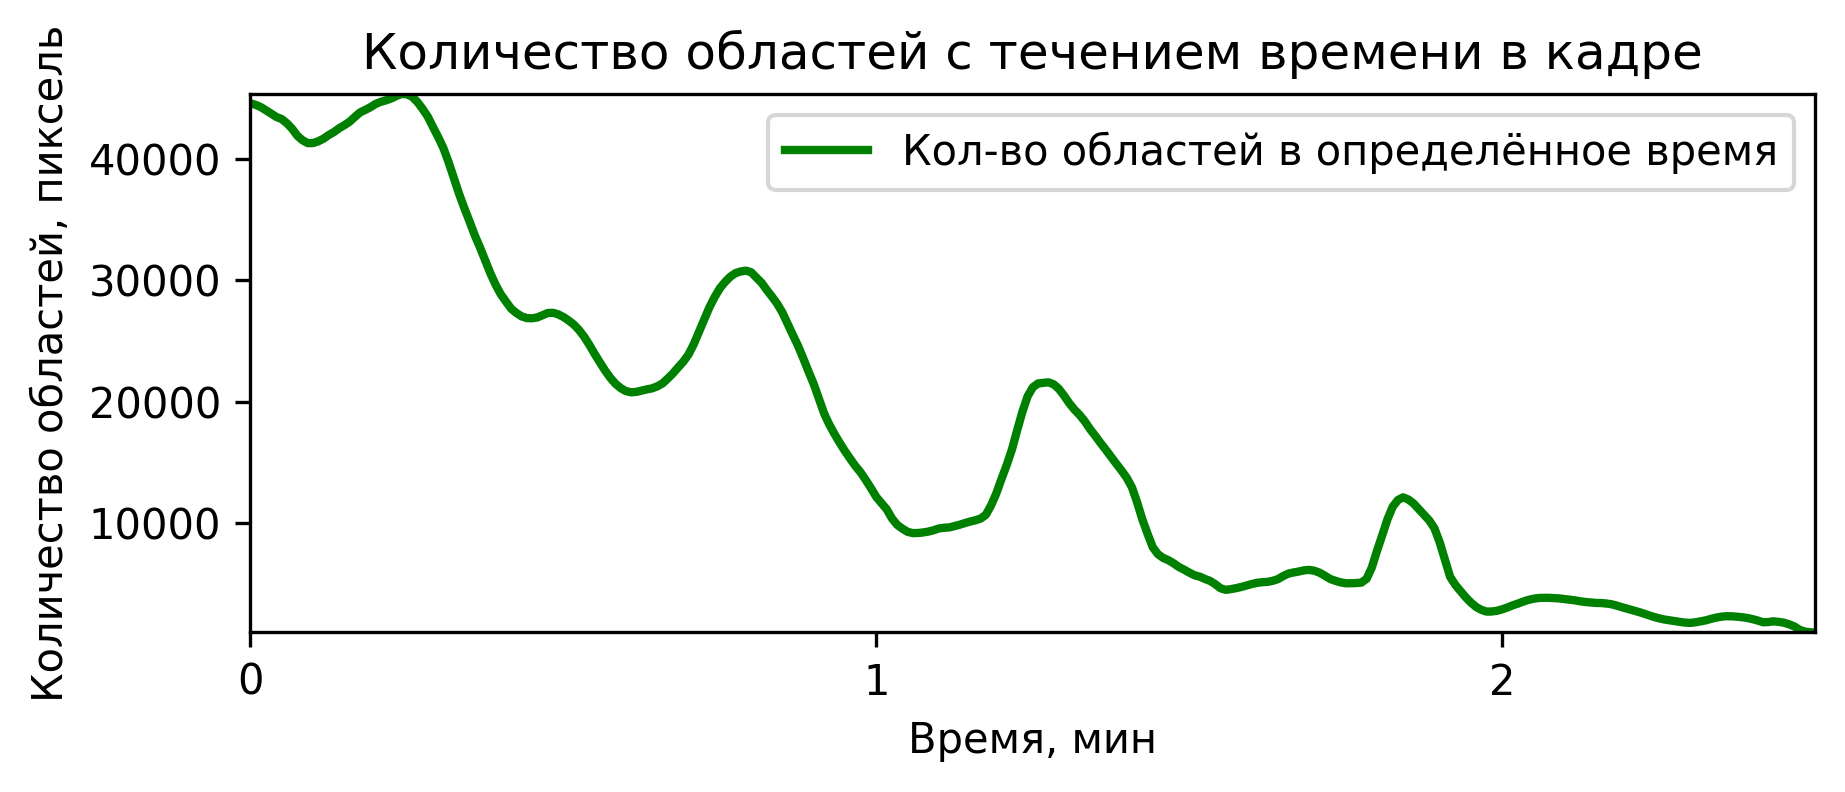

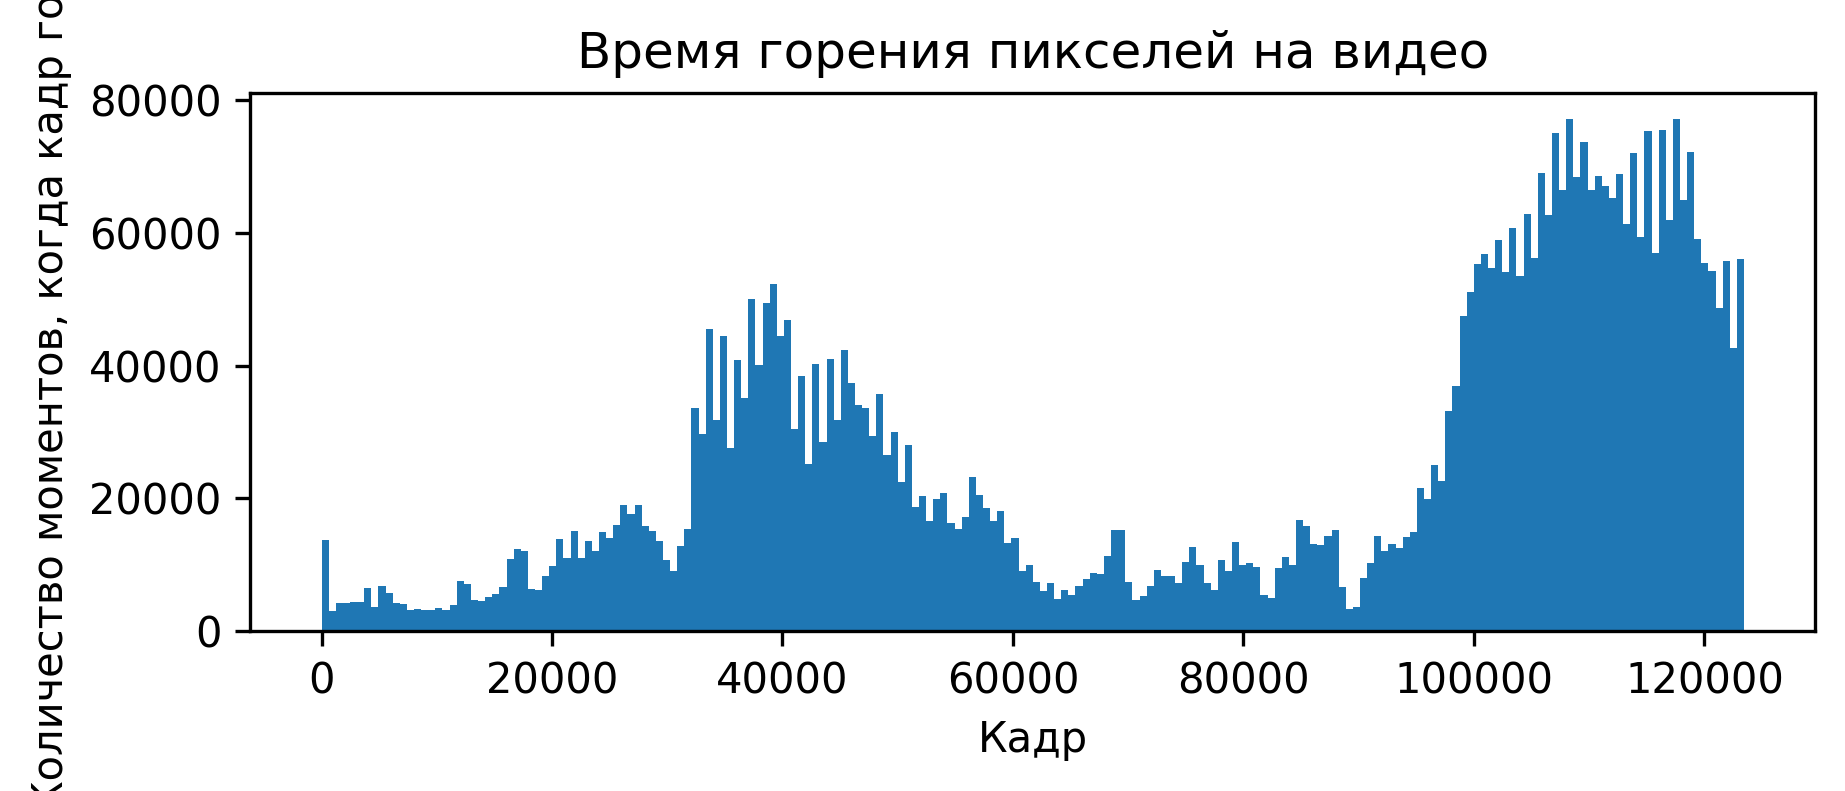

Для видео из папки «31_08_2020_tser2»


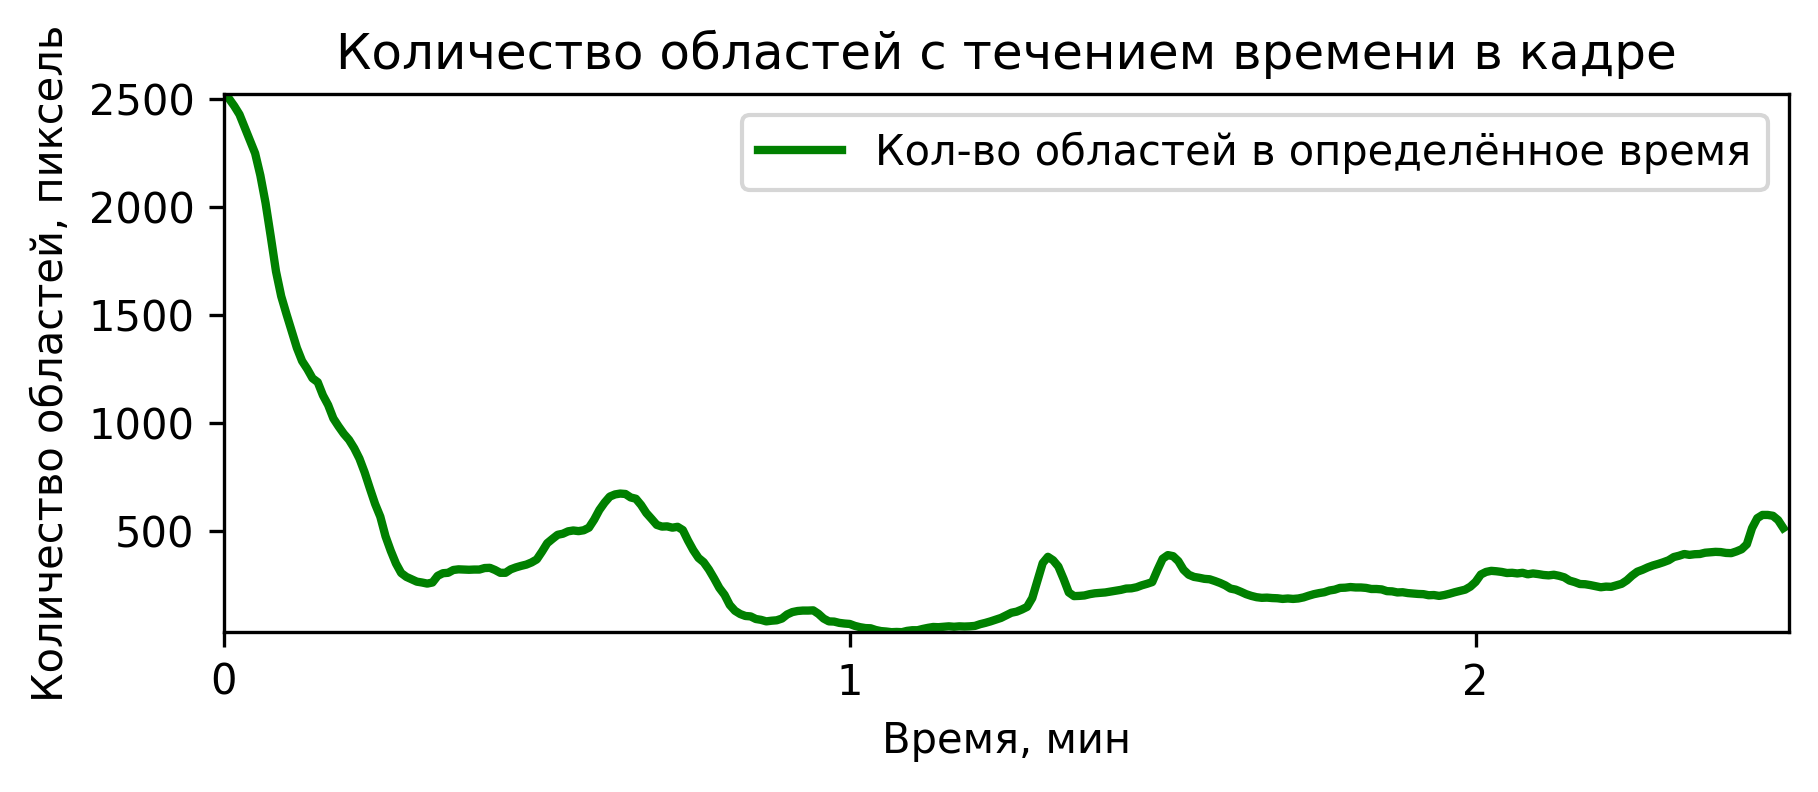

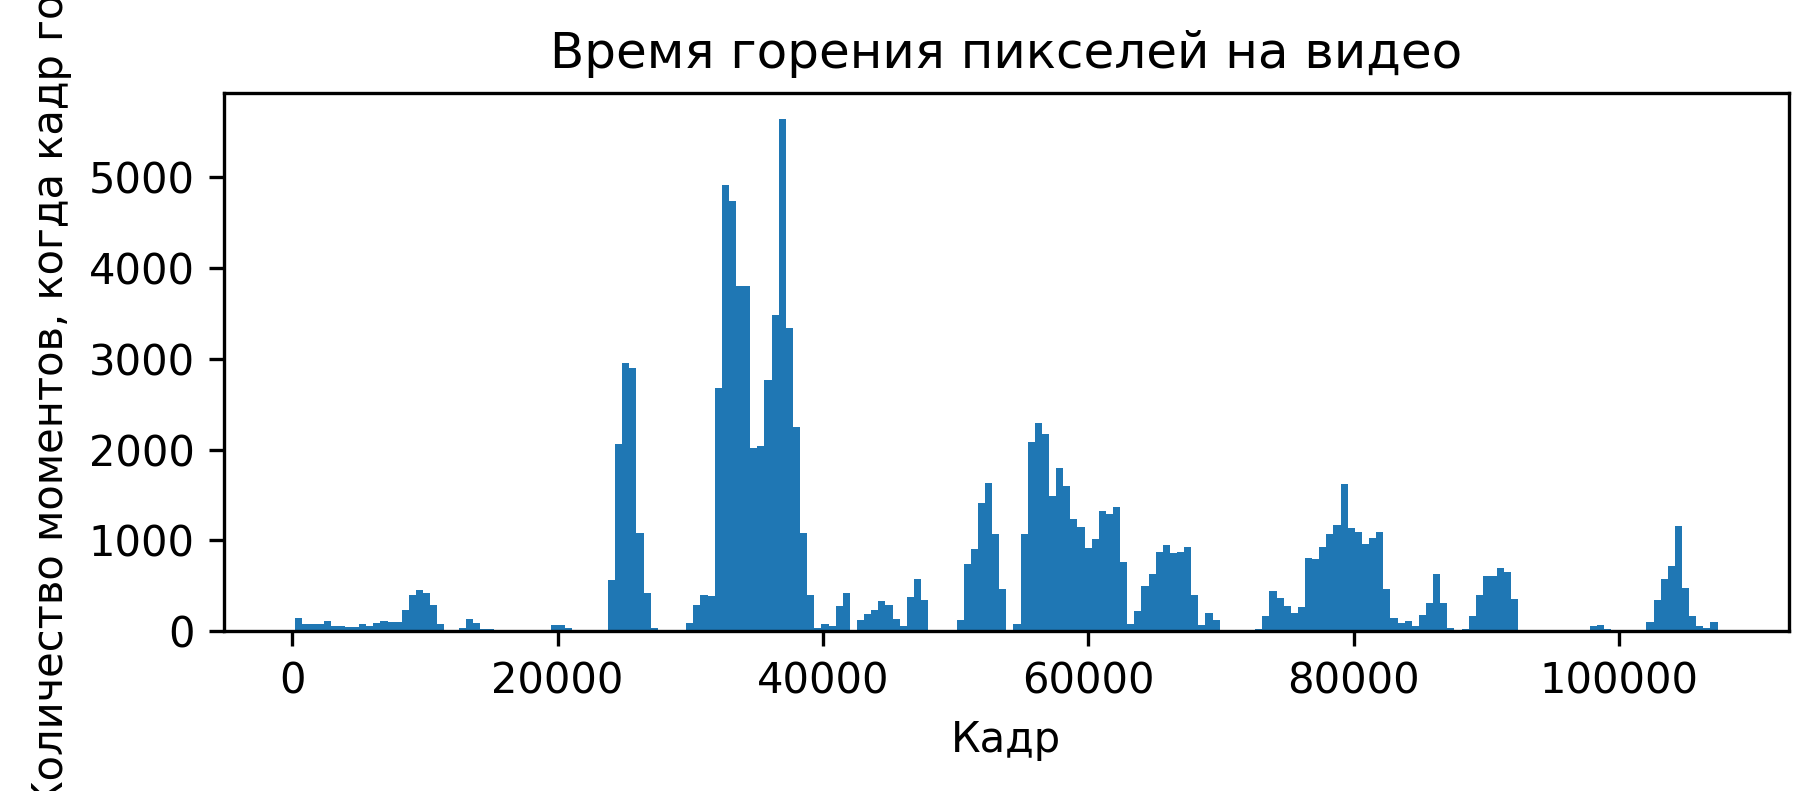

Для видео из папки «31_08_2020_tser3»


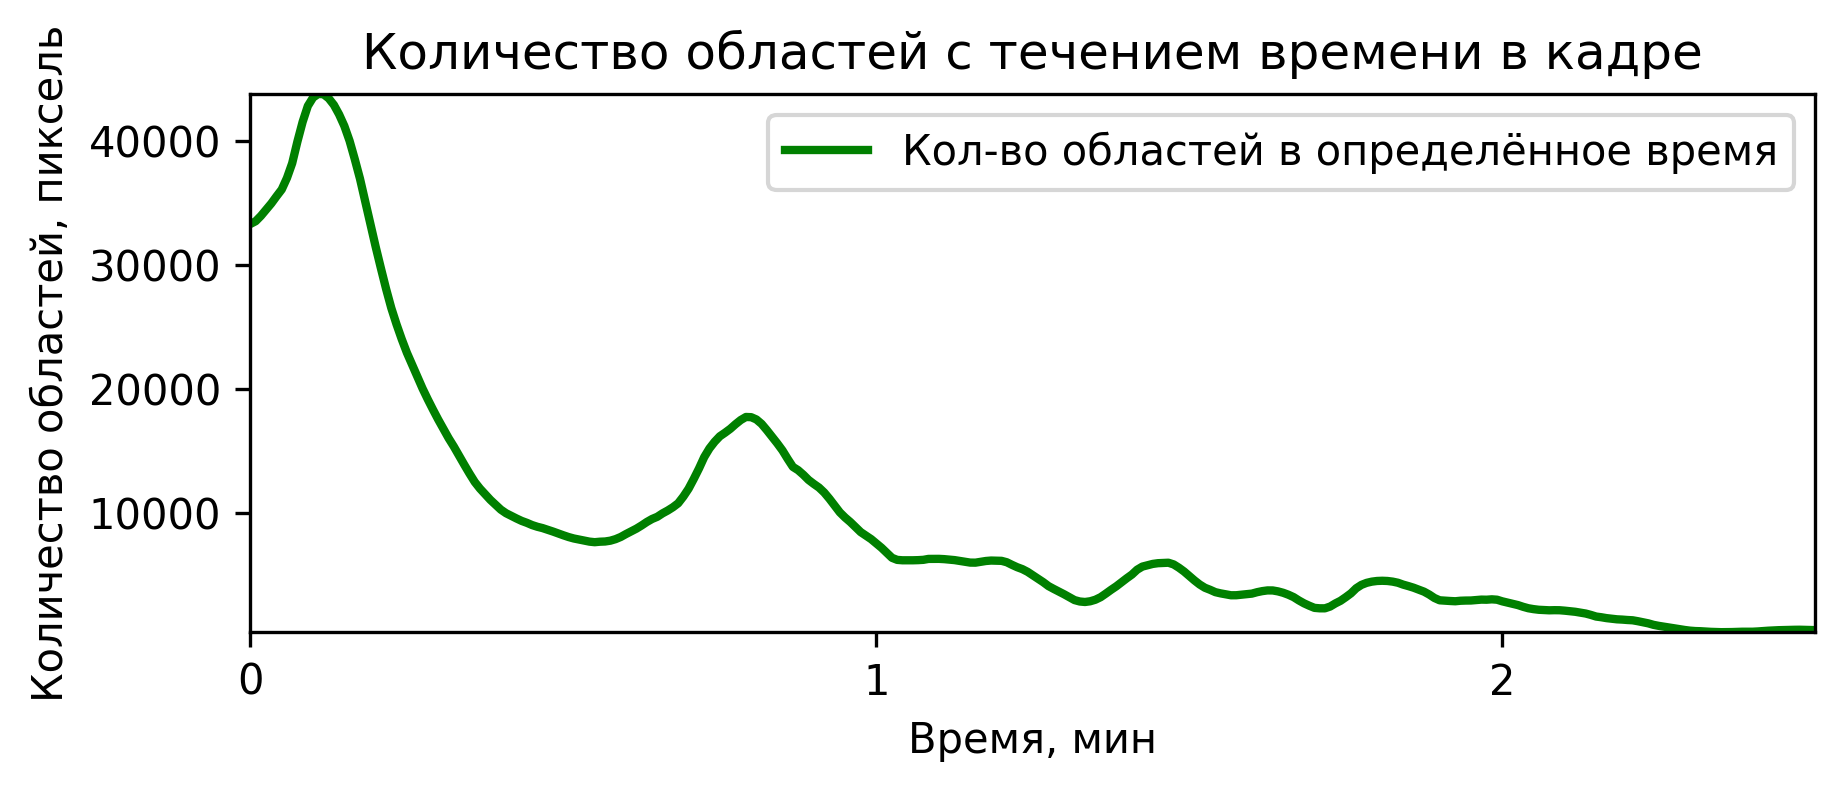

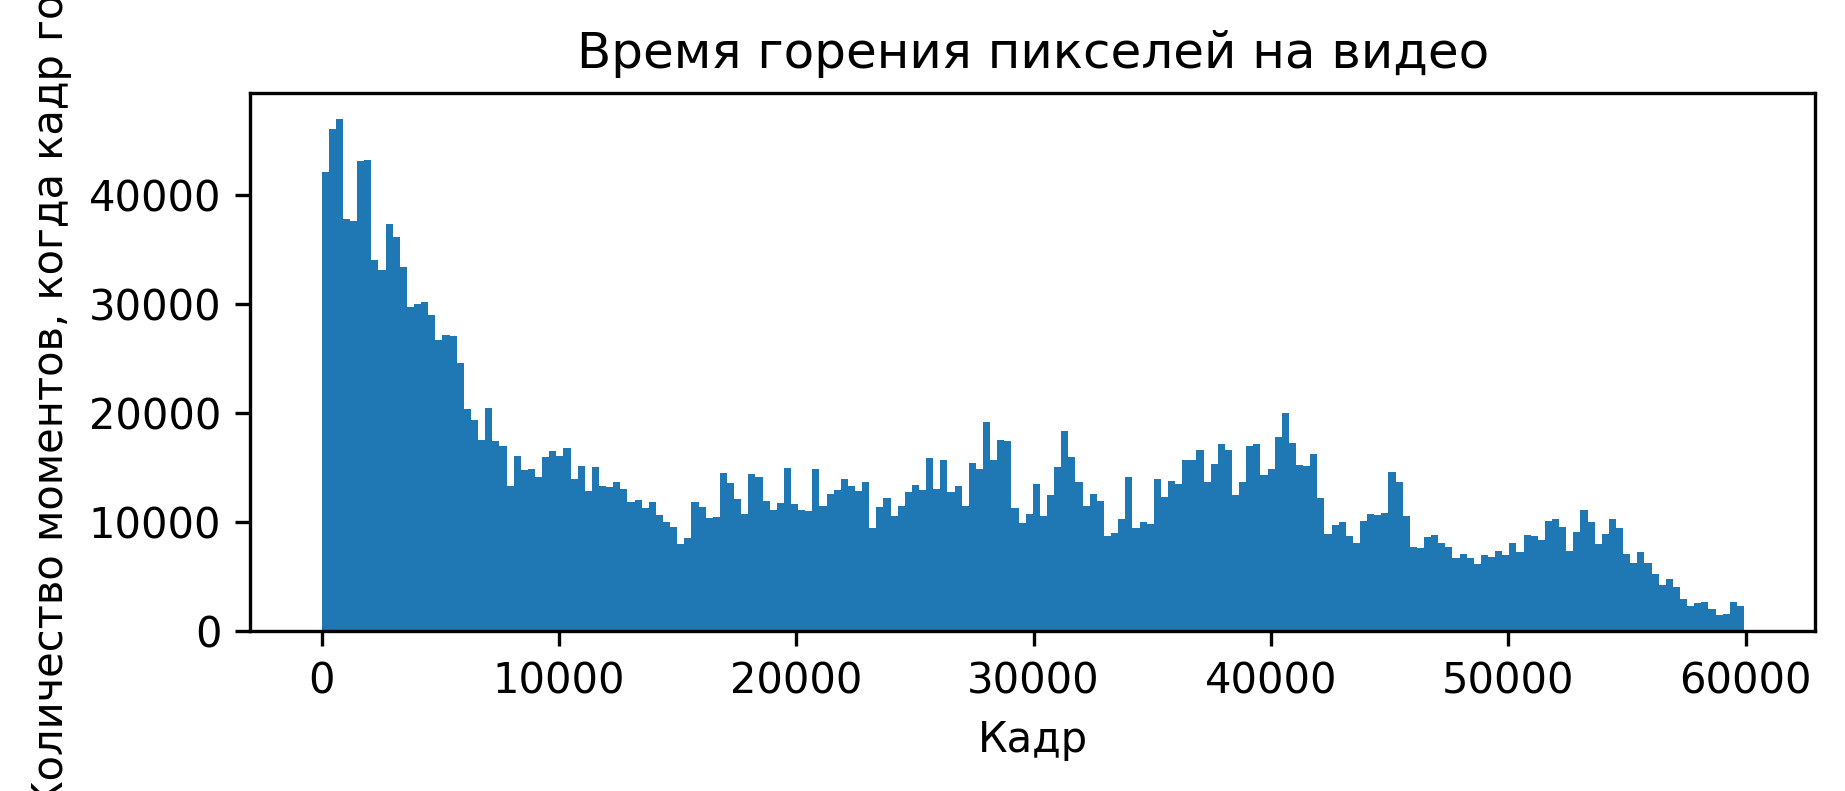

Для видео из папки «31_08_2020_tser4»


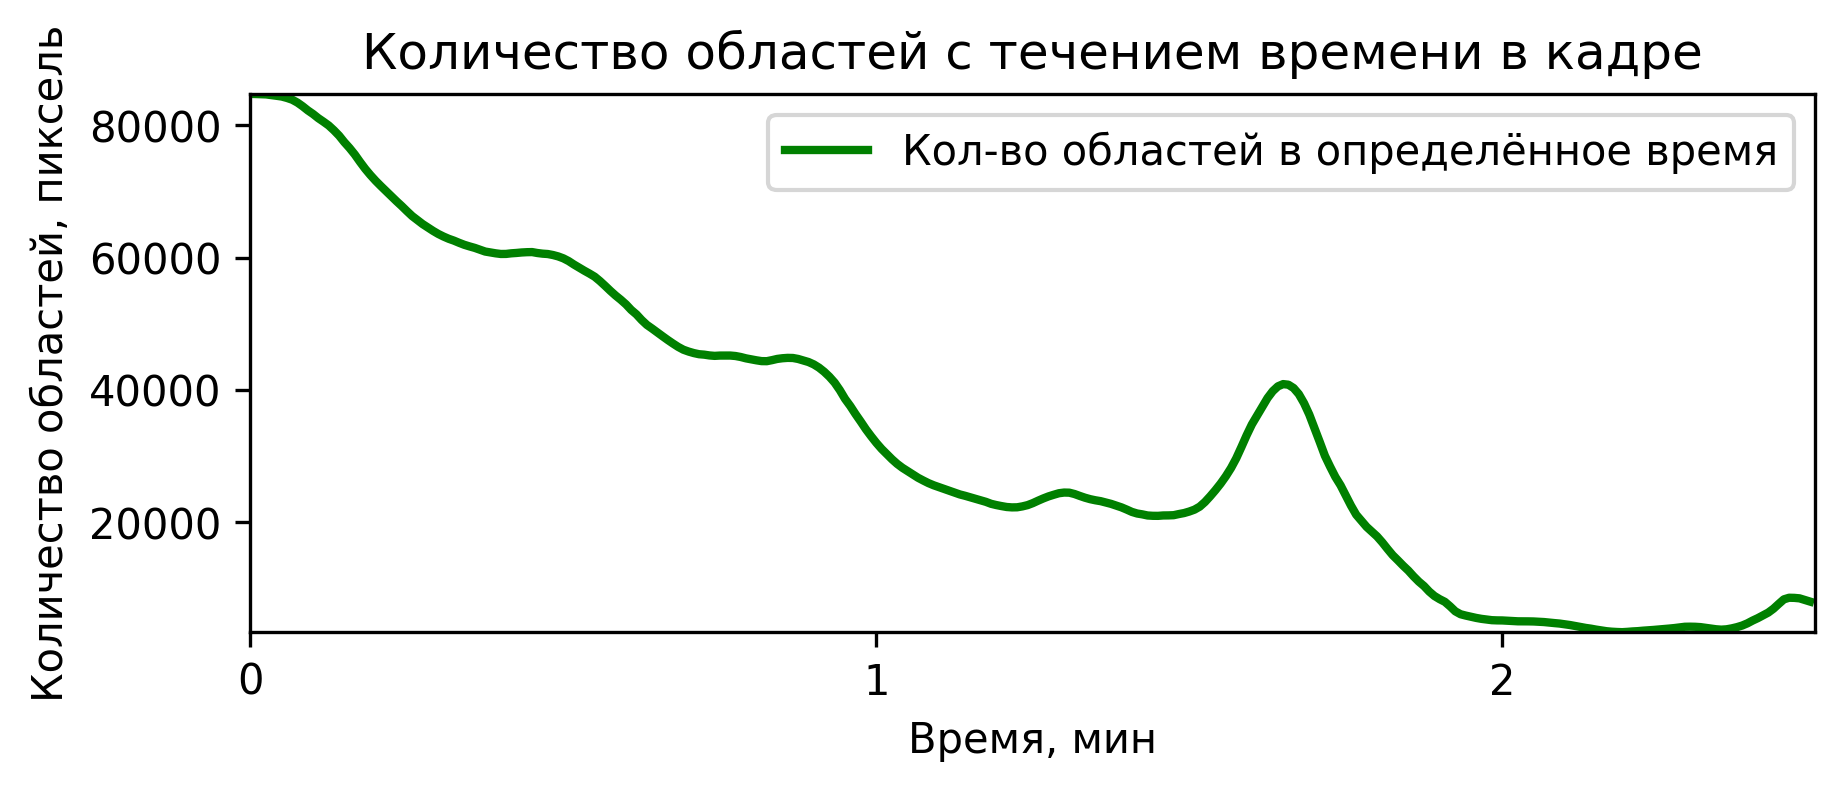

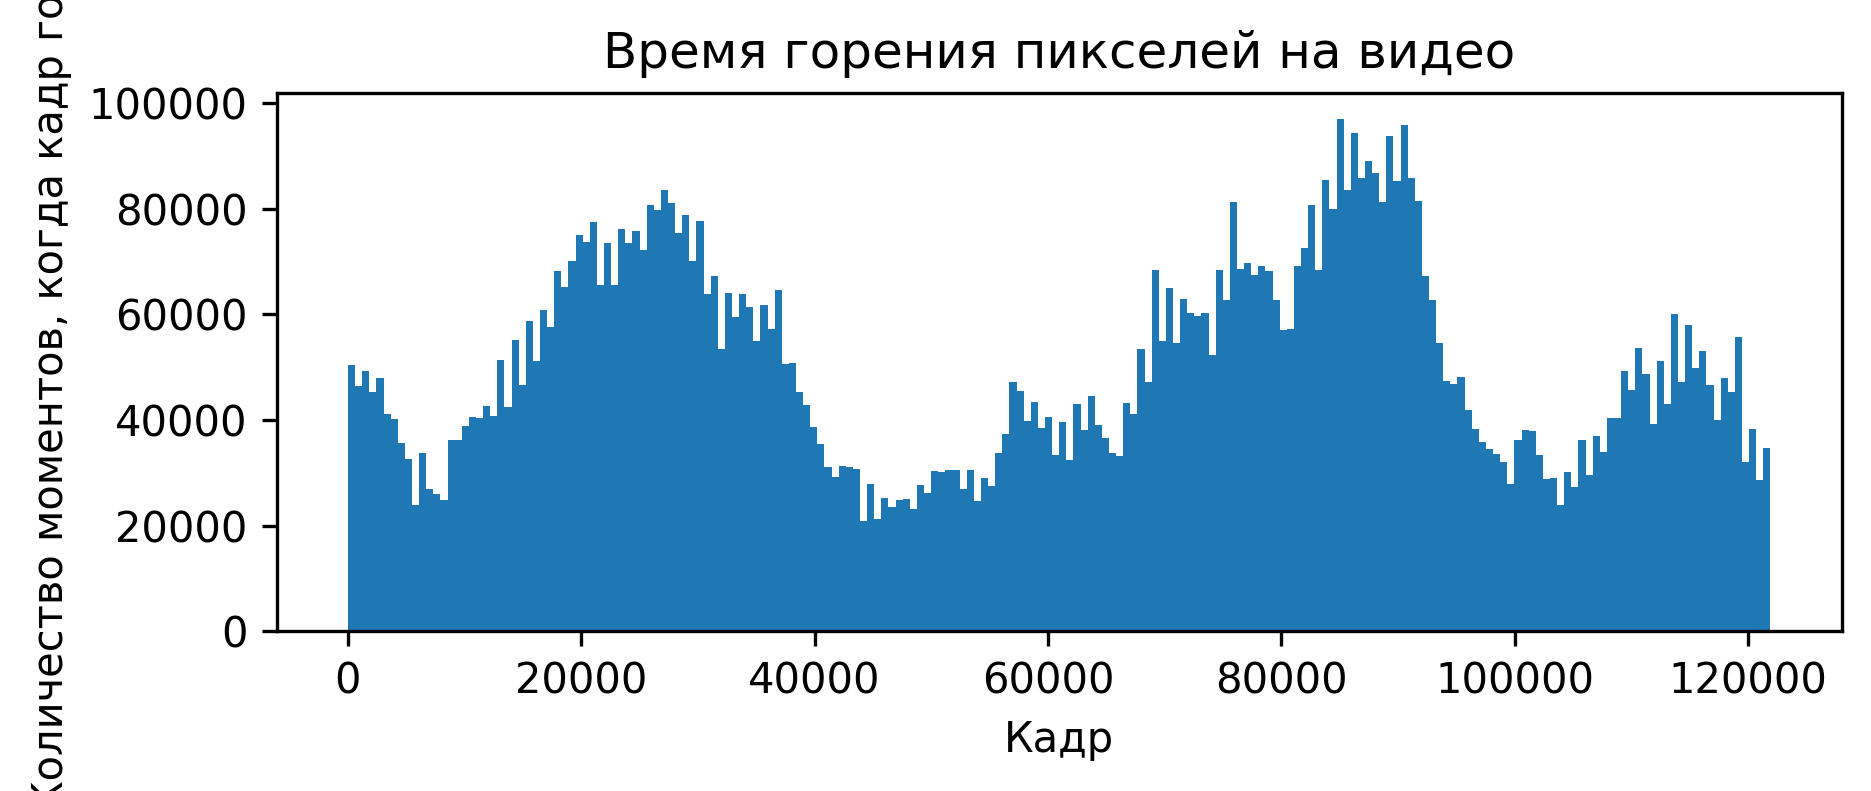

Для видео из папки «2016-05-18_fileNo11_BM3D_z-max»


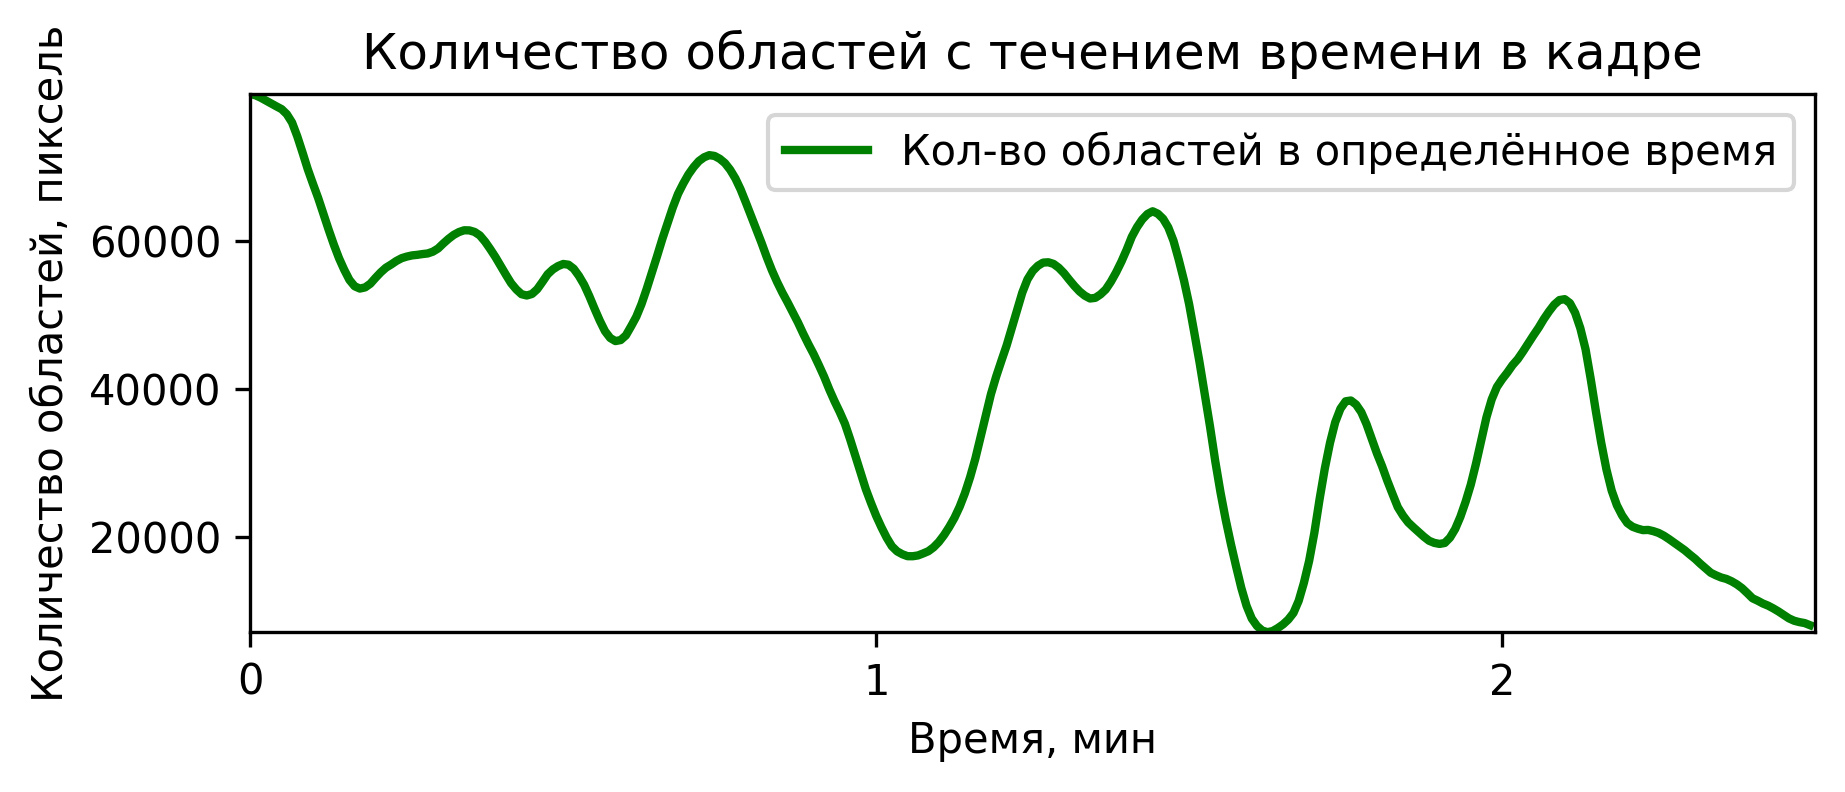

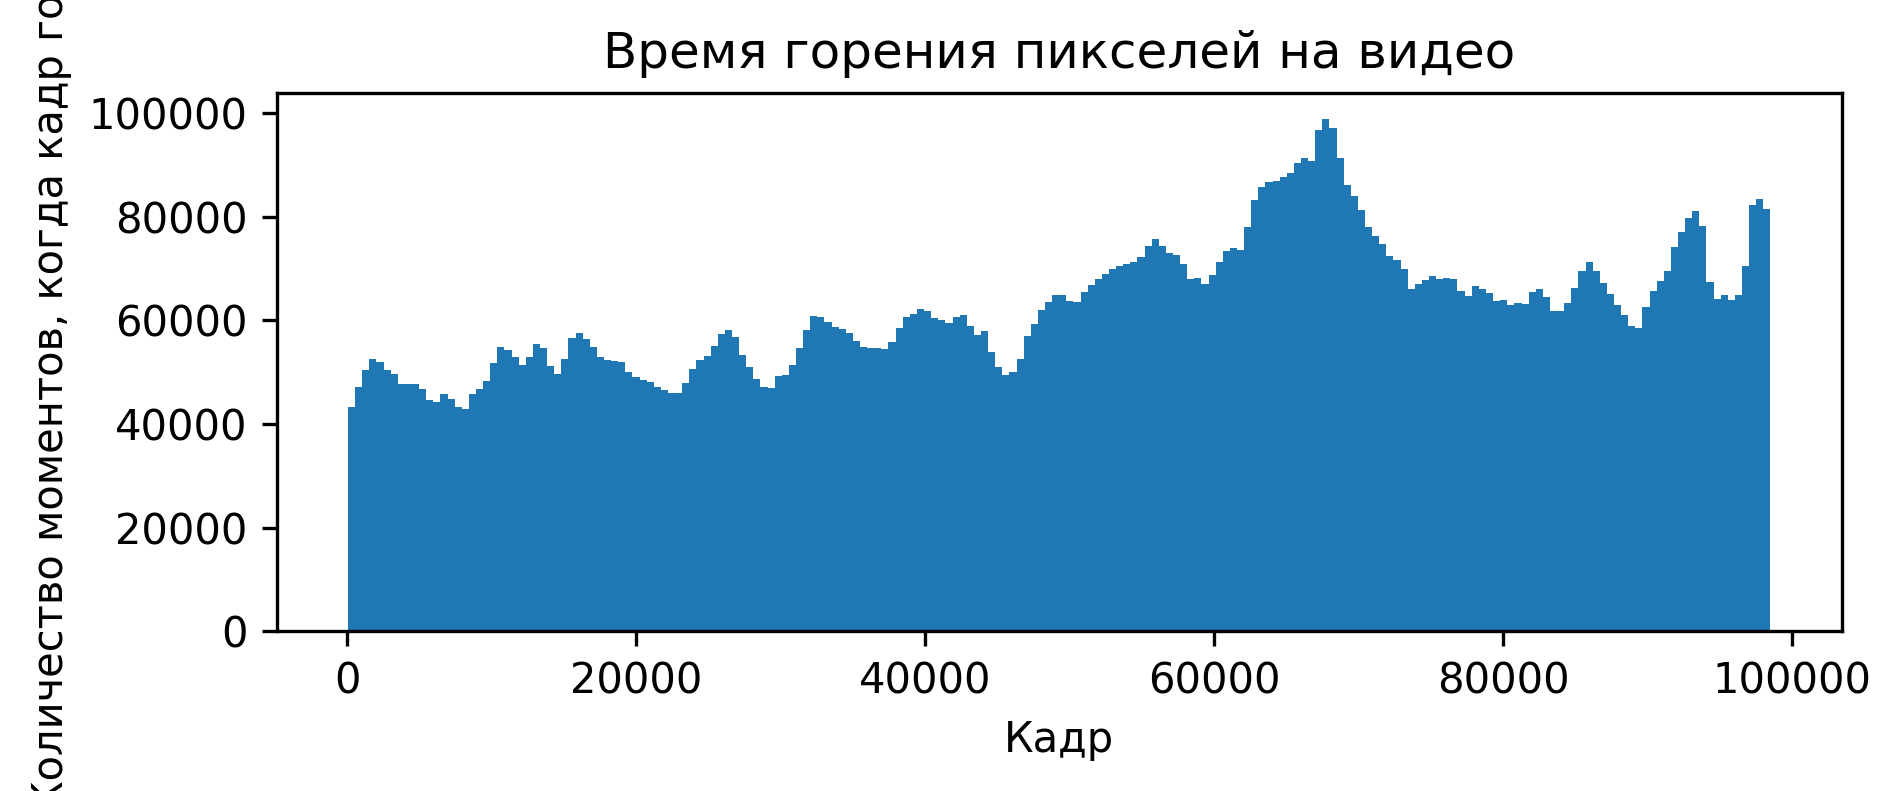

Для видео из папки «2016-05-26_fileNo32_BM3D_z-max»


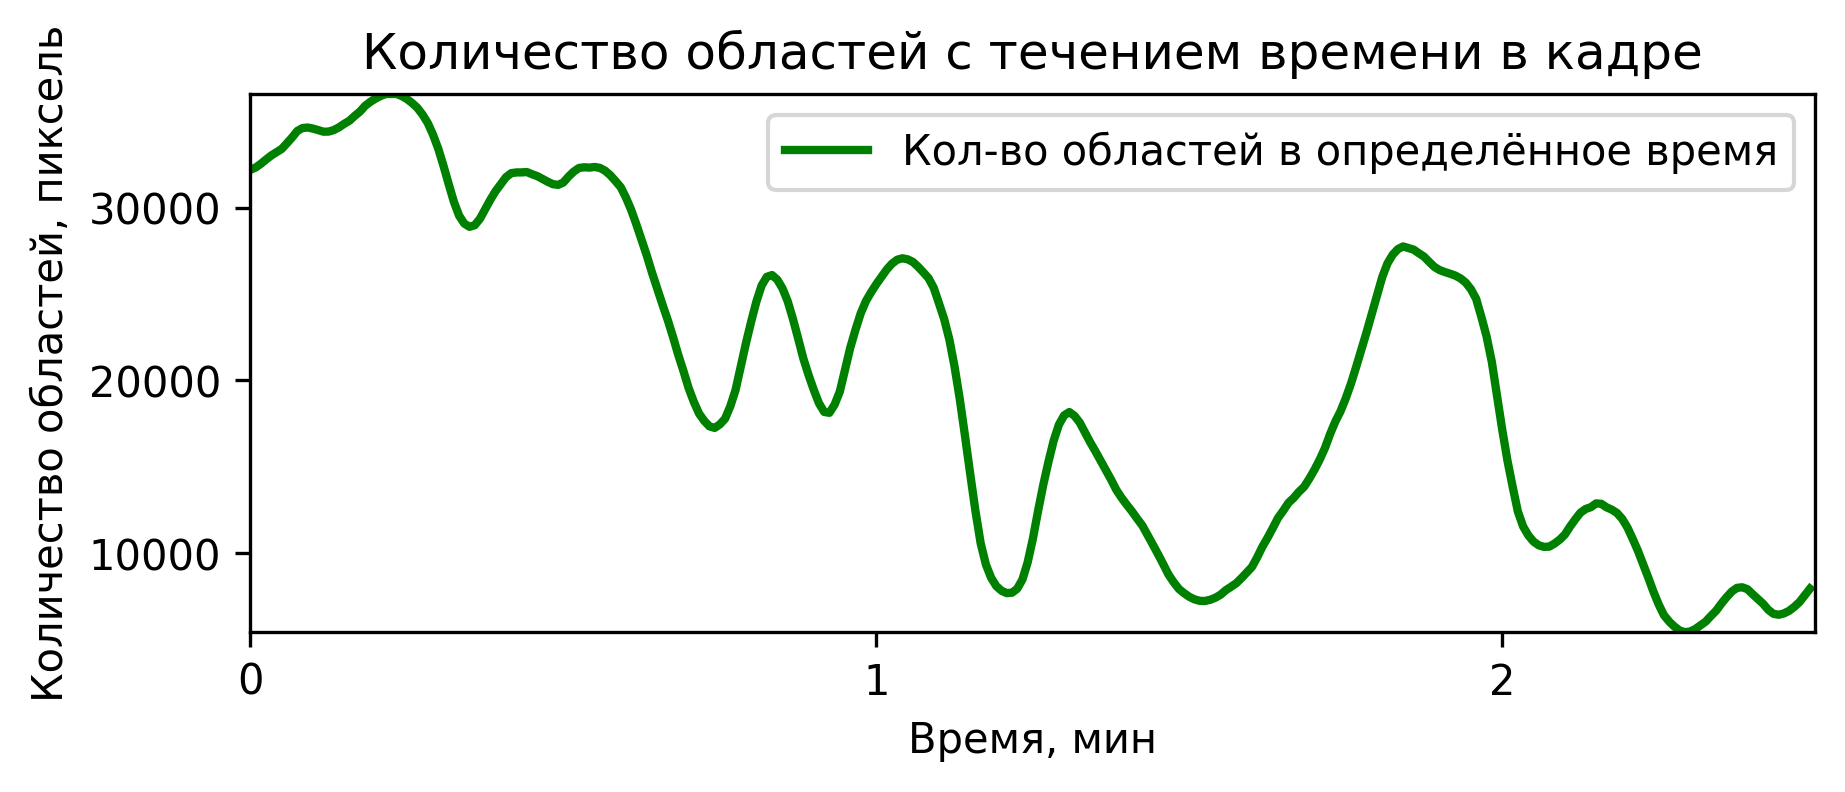

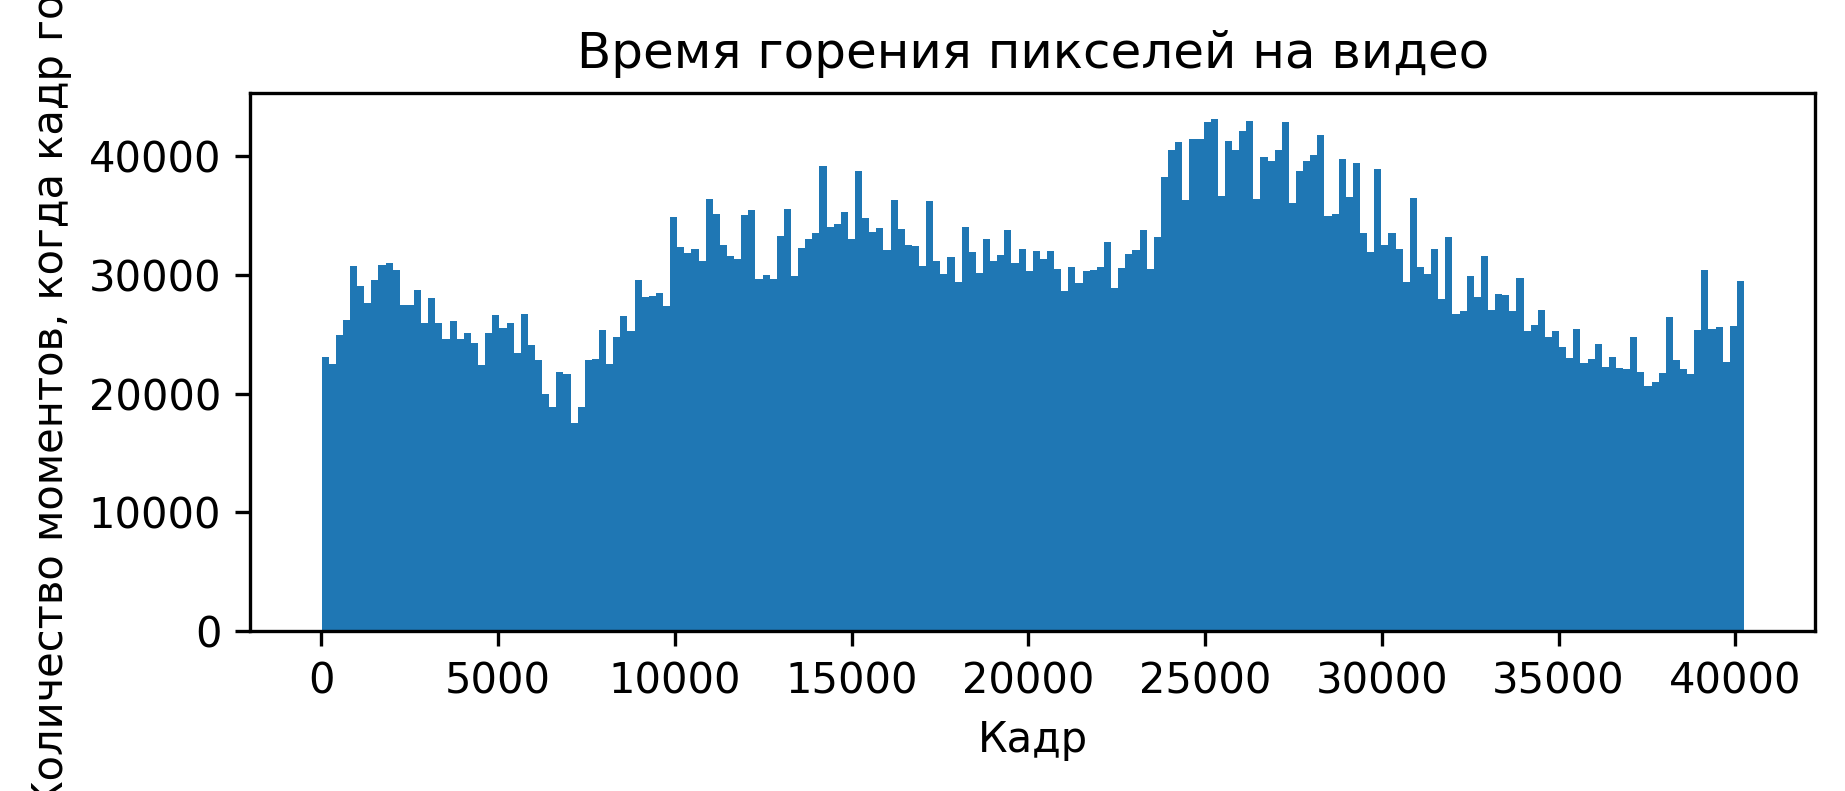

In [12]:
# Главная часть программы, которая использует ранее инициализированные функции
names = ['31_08_2020_tser1', '31_08_2020_tser2', '31_08_2020_tser3', '31_08_2020_tser4', '2016-05-18_fileNo11_BM3D_z-max', '2016-05-26_fileNo32_BM3D_z-max']
for i in range(len(names)):
    print("Для видео из папки «" + names[i] + "»")
    images = GetEvents(names[i])
    Points = GetGlowPointsForGraph(images)
    DrawGraph(Points, names[i])
    NumLightPixel = GetNumLightPixel(images)
    DrawHistogram(NumLightPixel)


e:\Python\Final-problem\packageModules\ImageModule.py:10: SyntaxWarning: invalid escape sequence '\d'
  file_names.sort(key=lambda x: int(re.search('event_t(\d+)\.png', x).group(1)))
e:\Python\Final-problem\packageModules\ImageModule.py:19: SyntaxWarning: invalid escape sequence '\d'
  file_names.sort(key=lambda x: int(re.search('smoothed_t(\d+)\.png', x).group(1)))


Для видео из папки «31_08_2020_tser1»


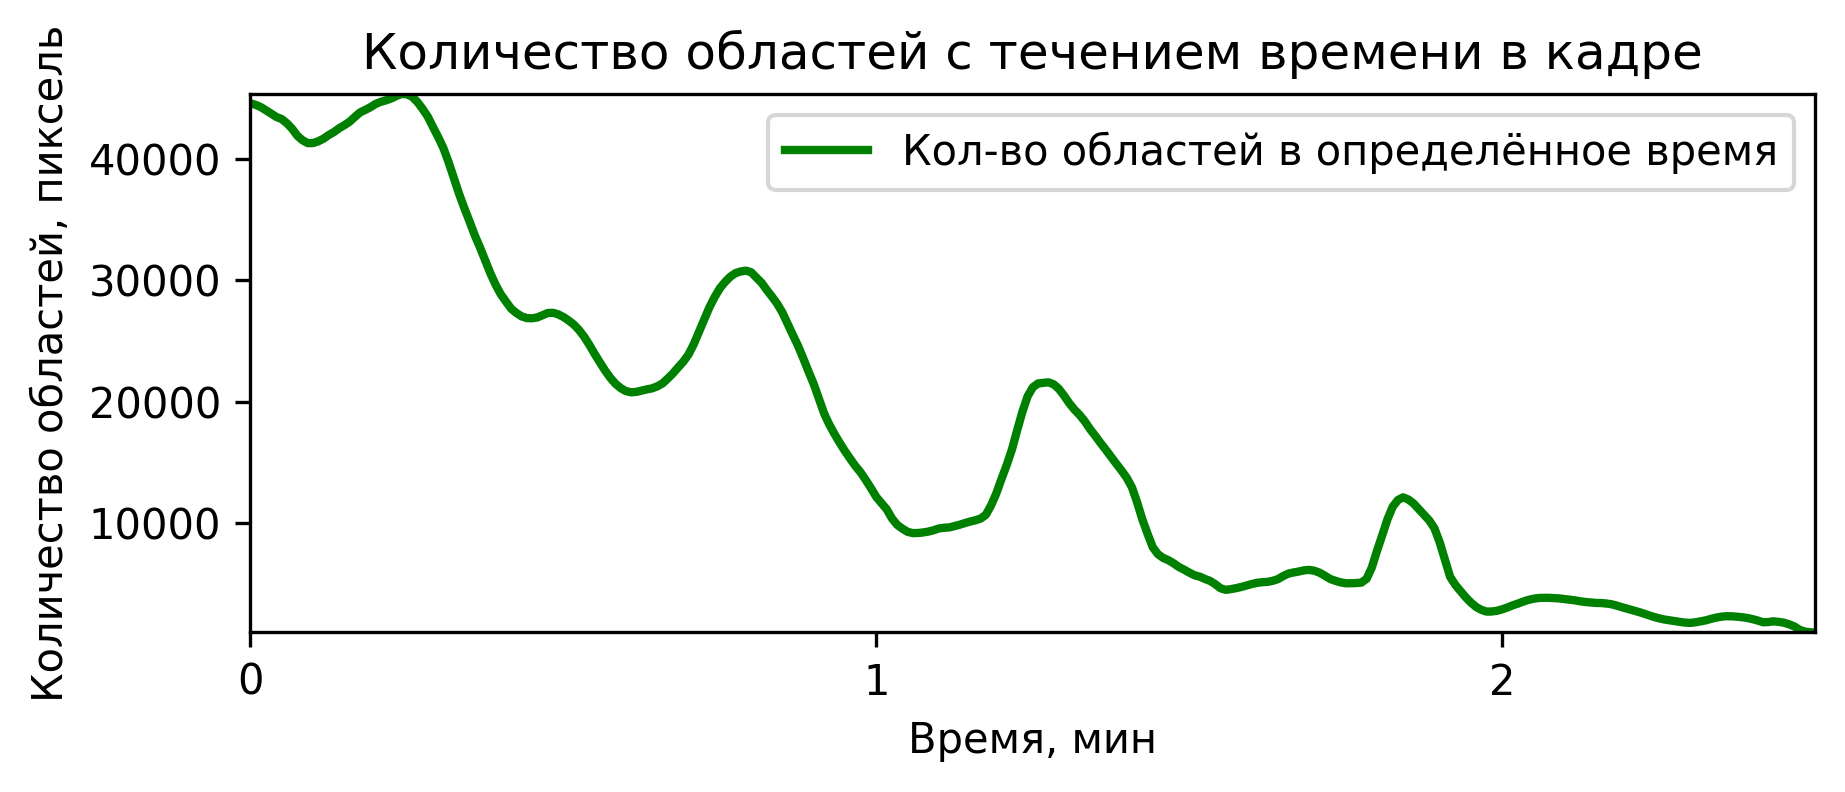

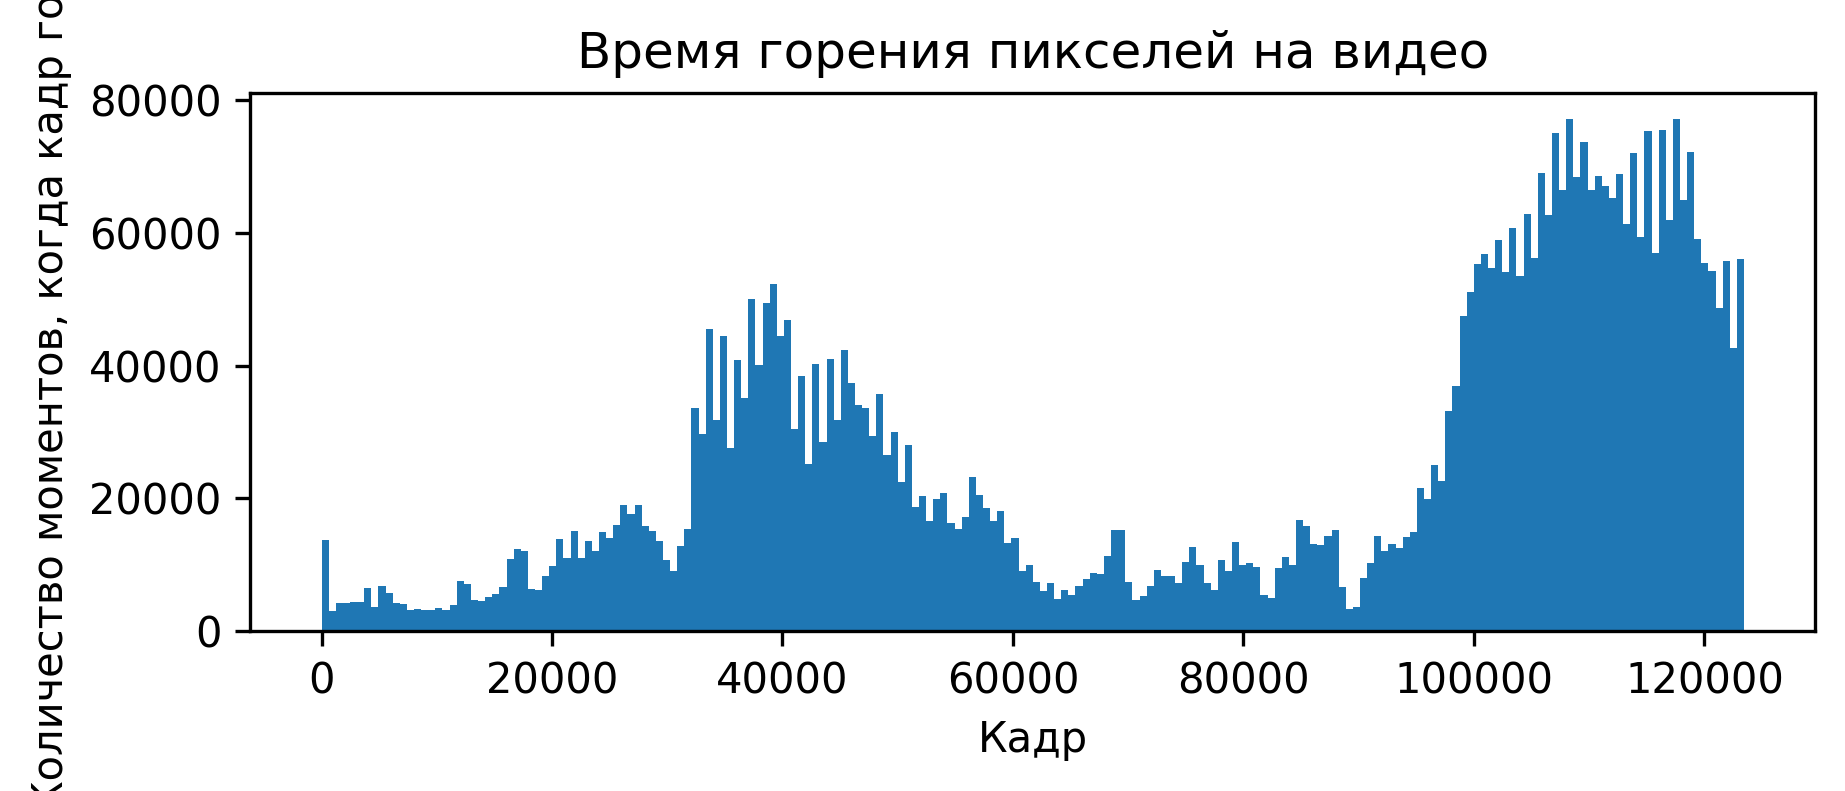

Для видео из папки «31_08_2020_tser2»


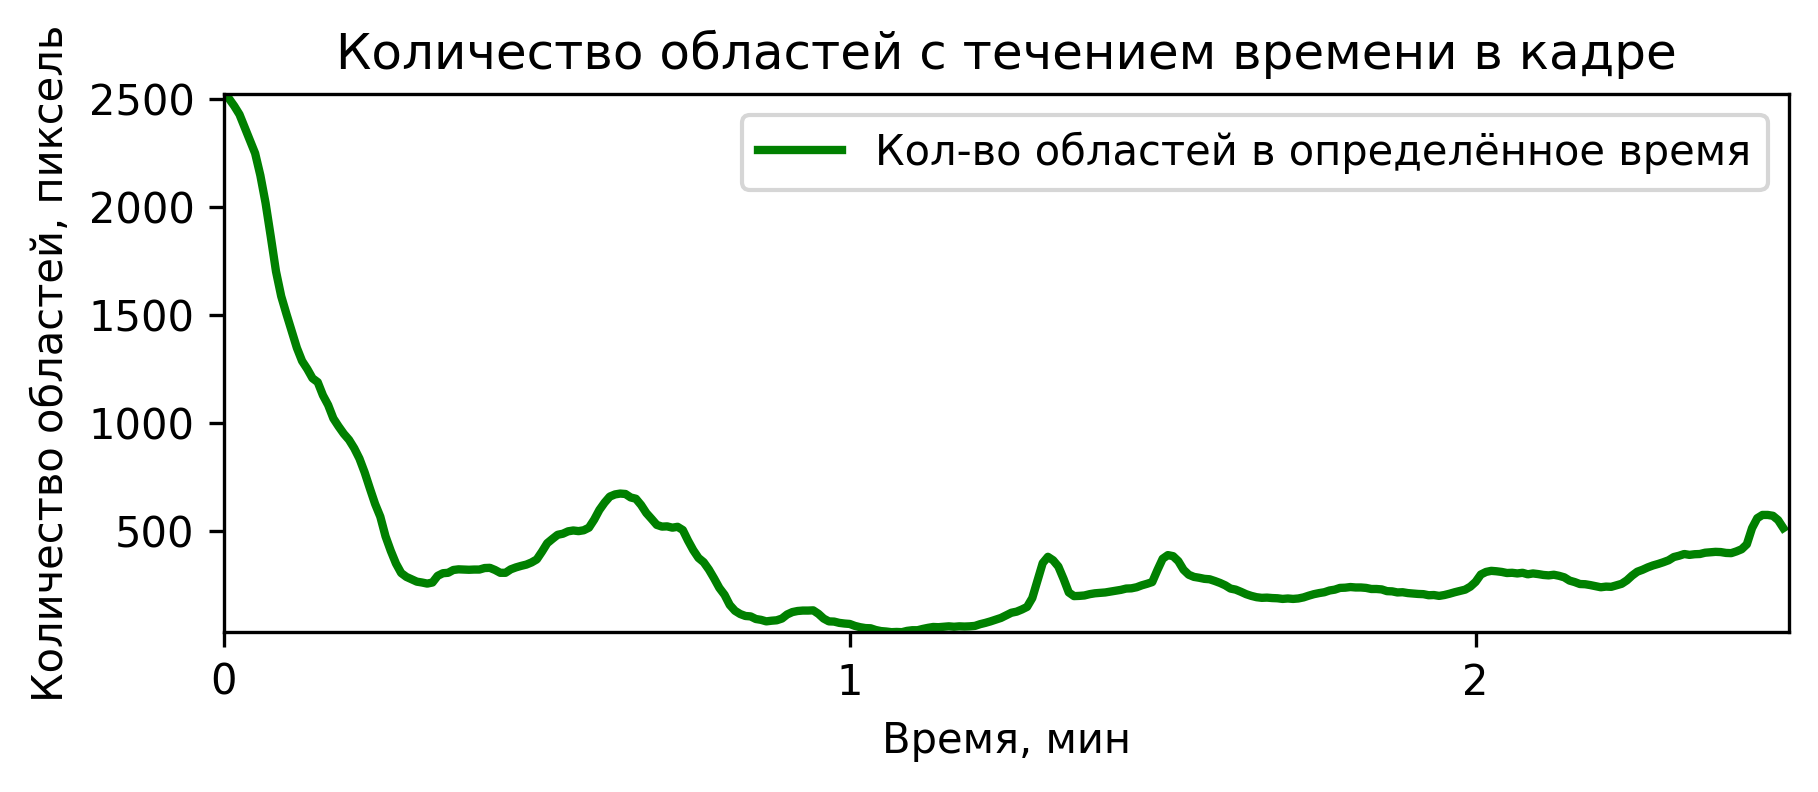

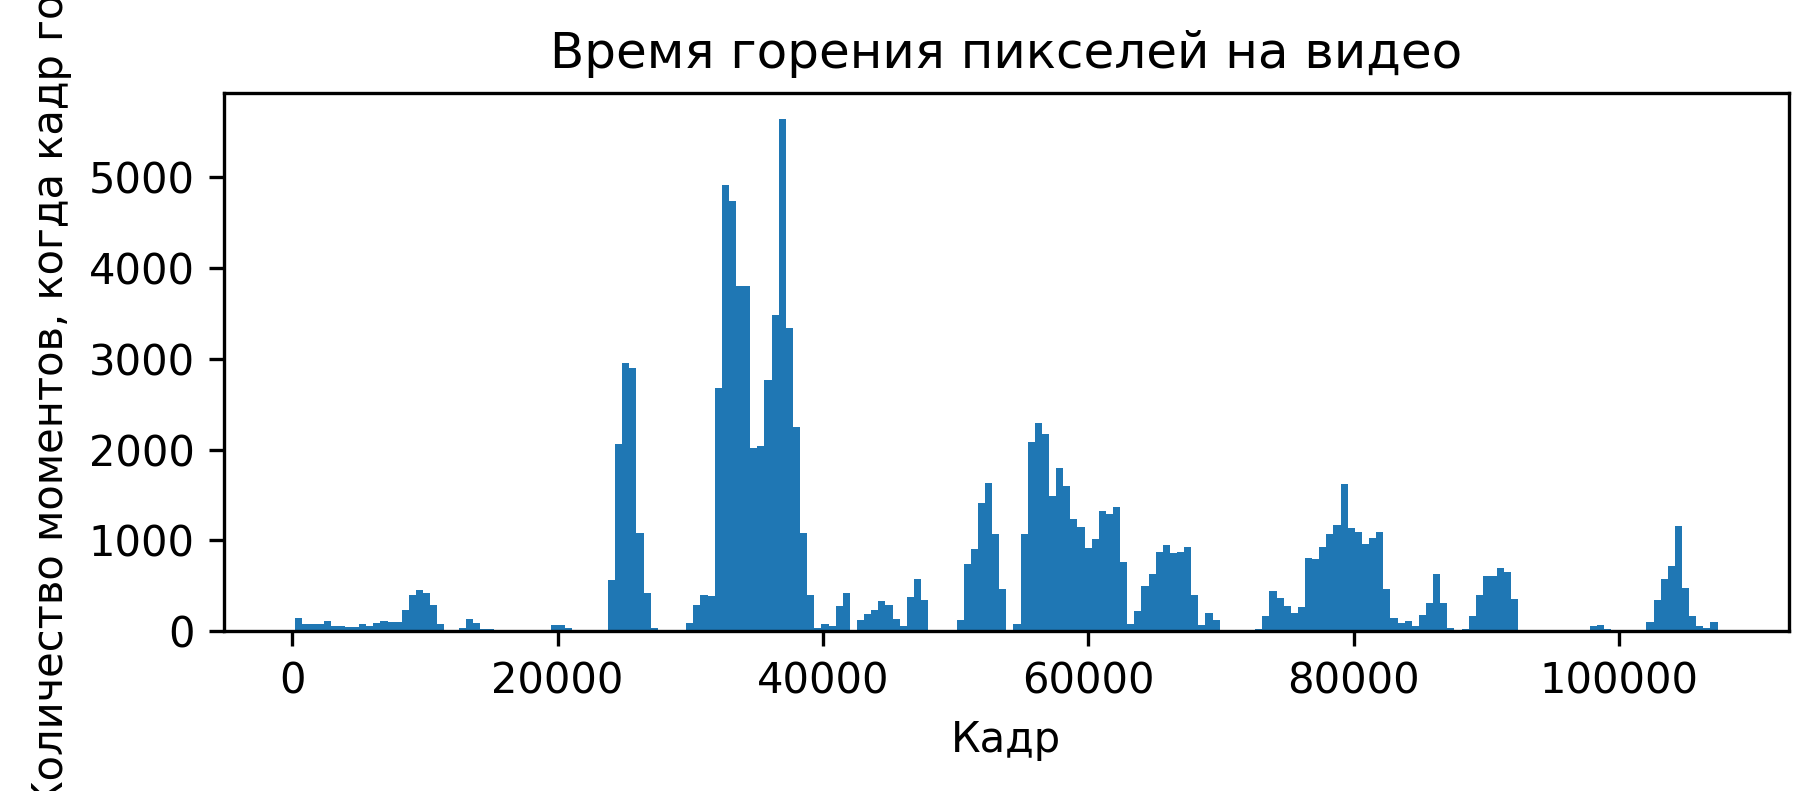

Для видео из папки «31_08_2020_tser3»


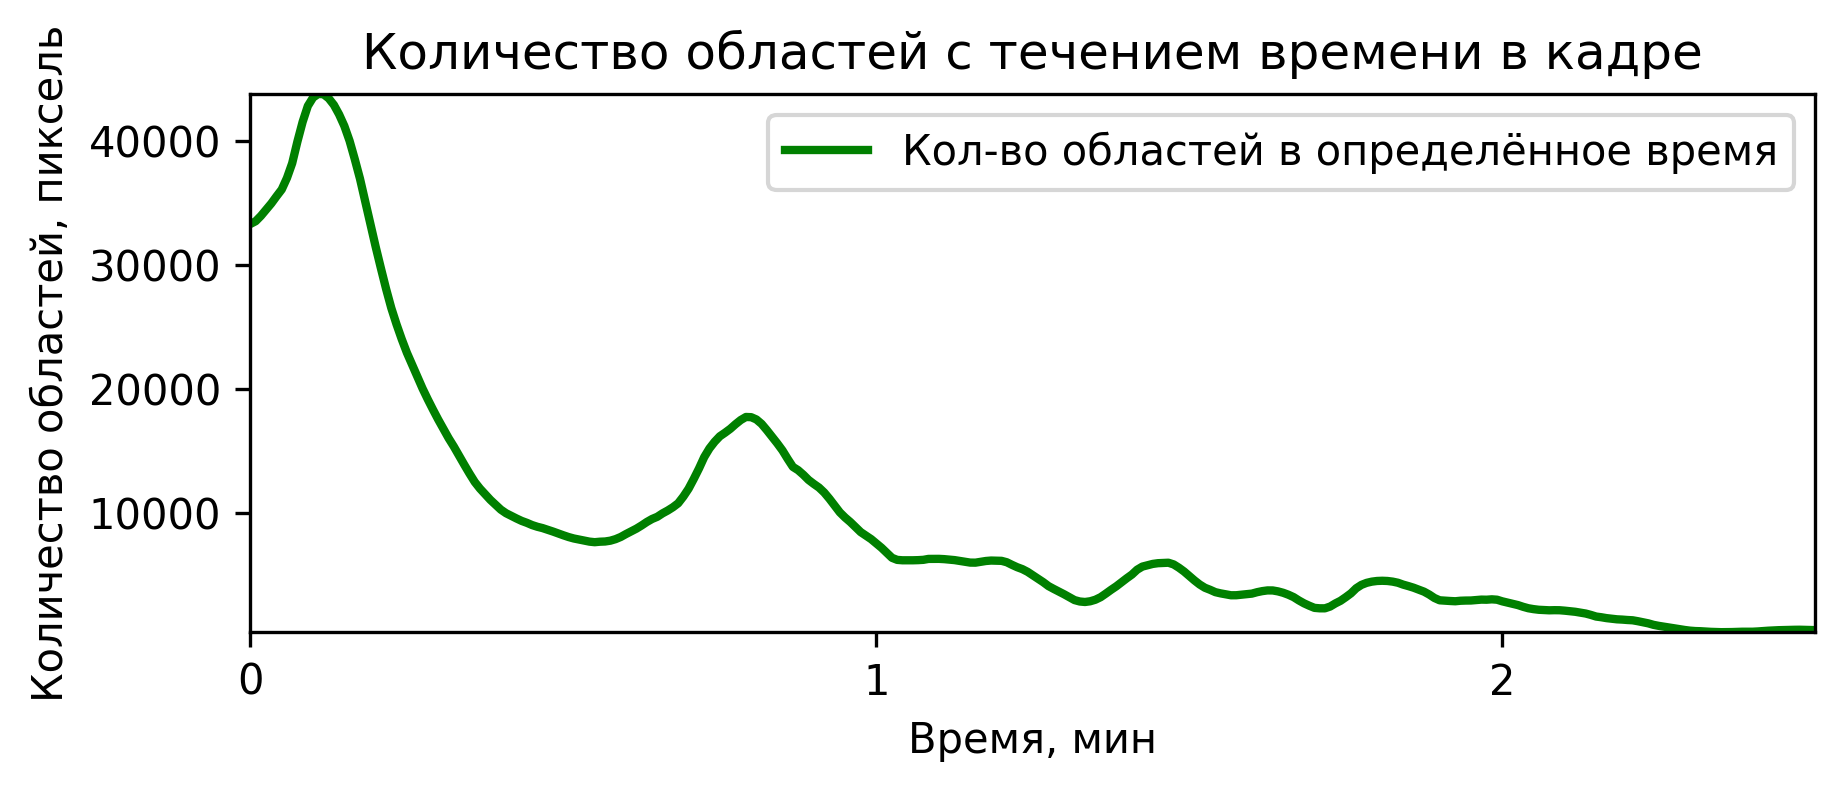

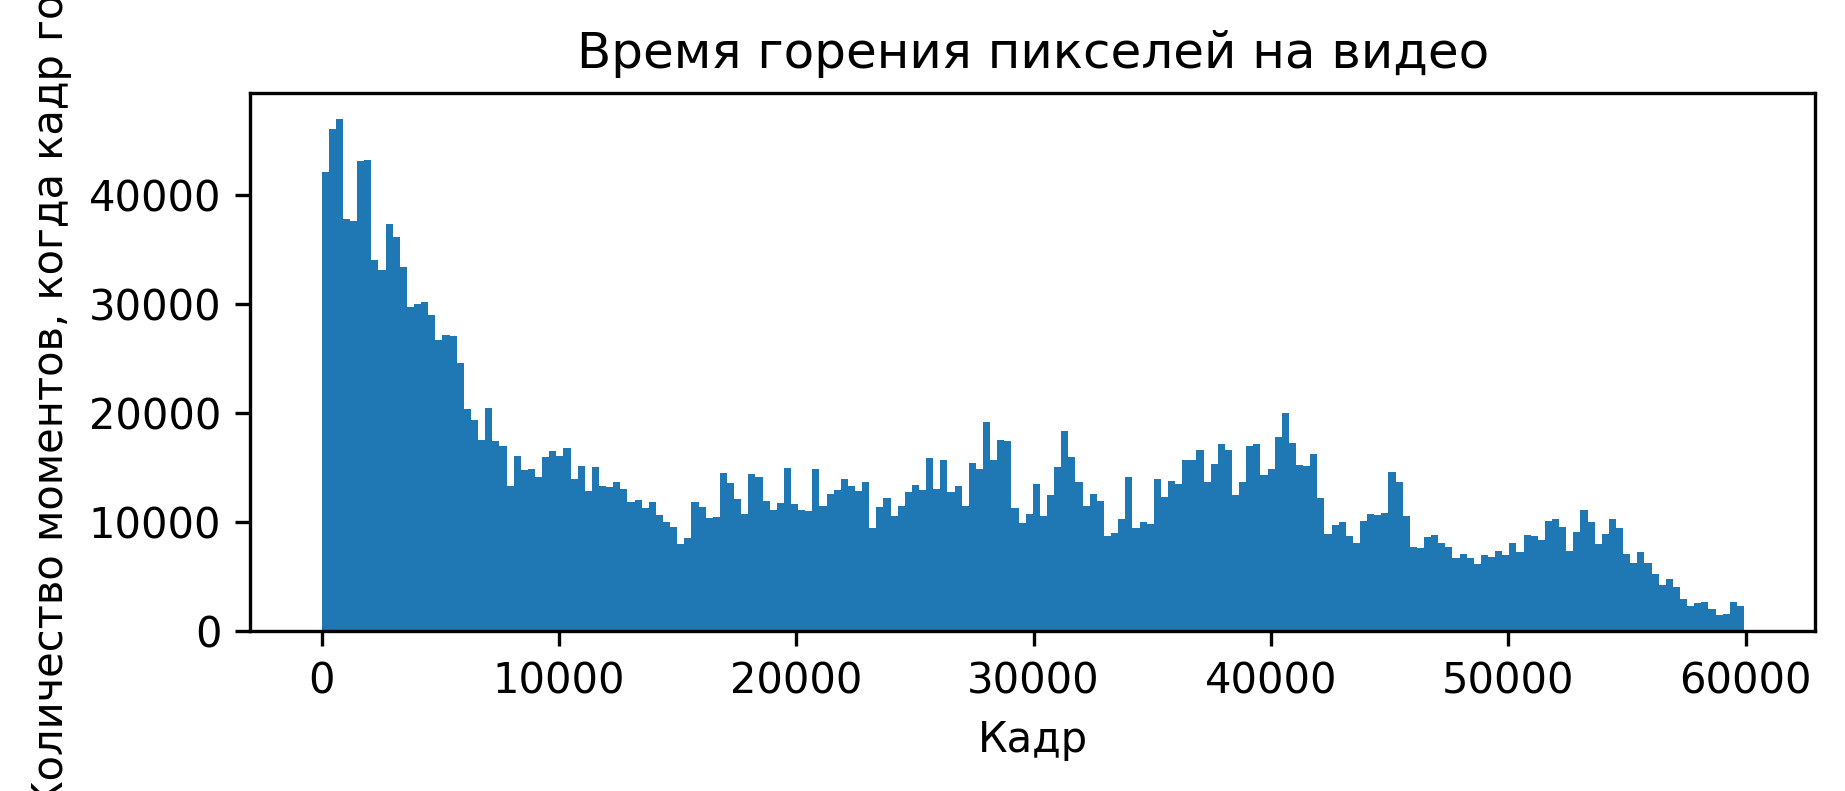

Для видео из папки «31_08_2020_tser4»


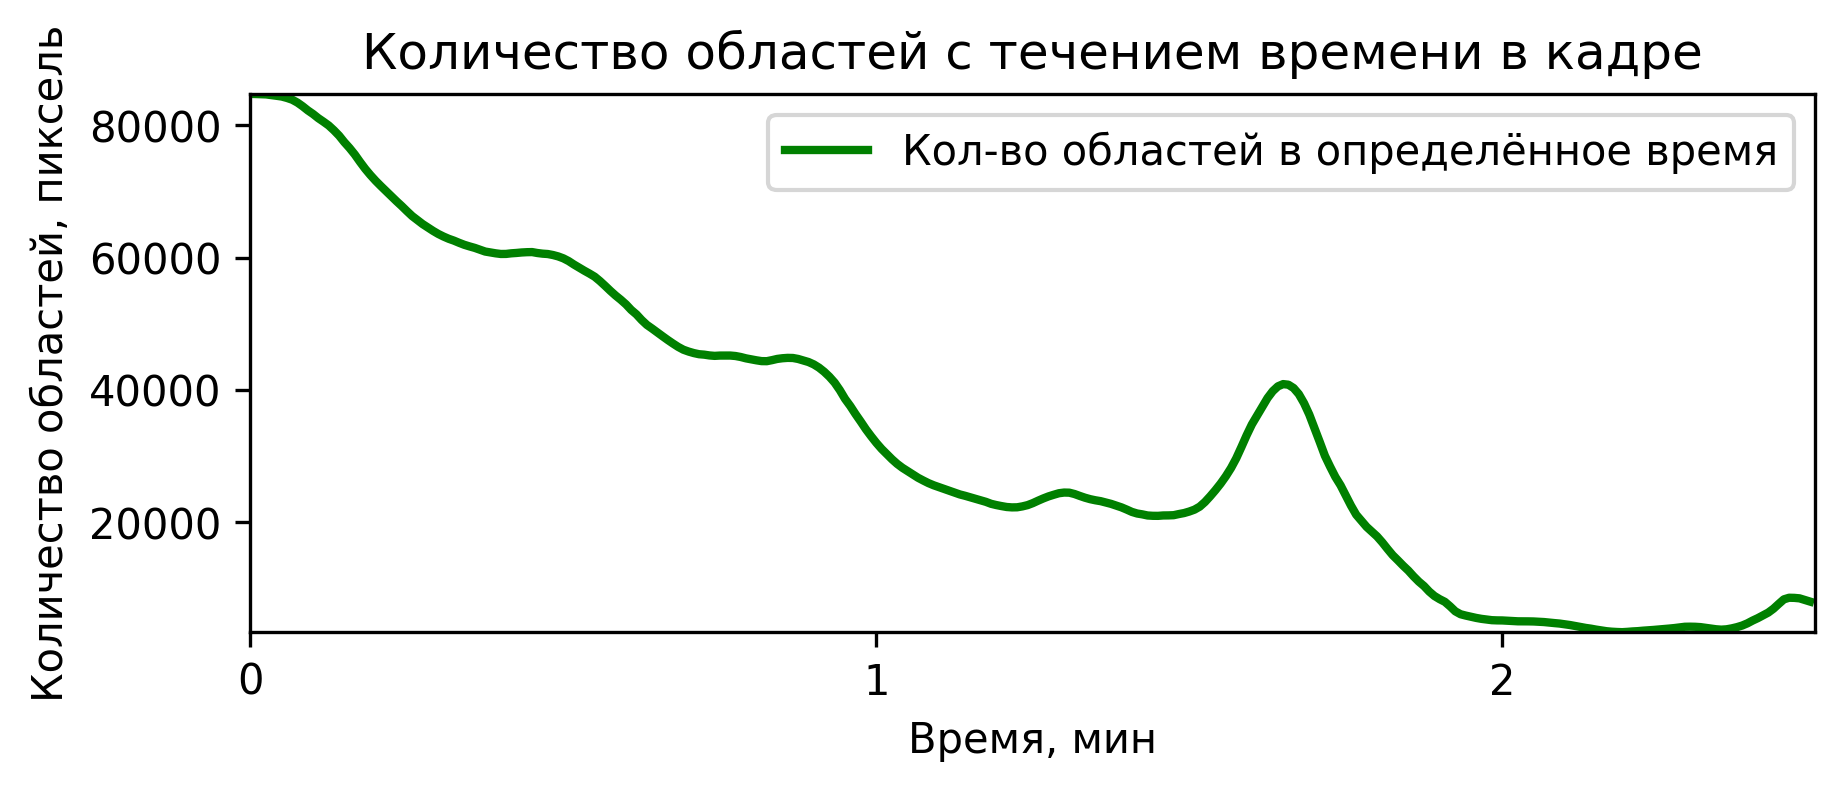

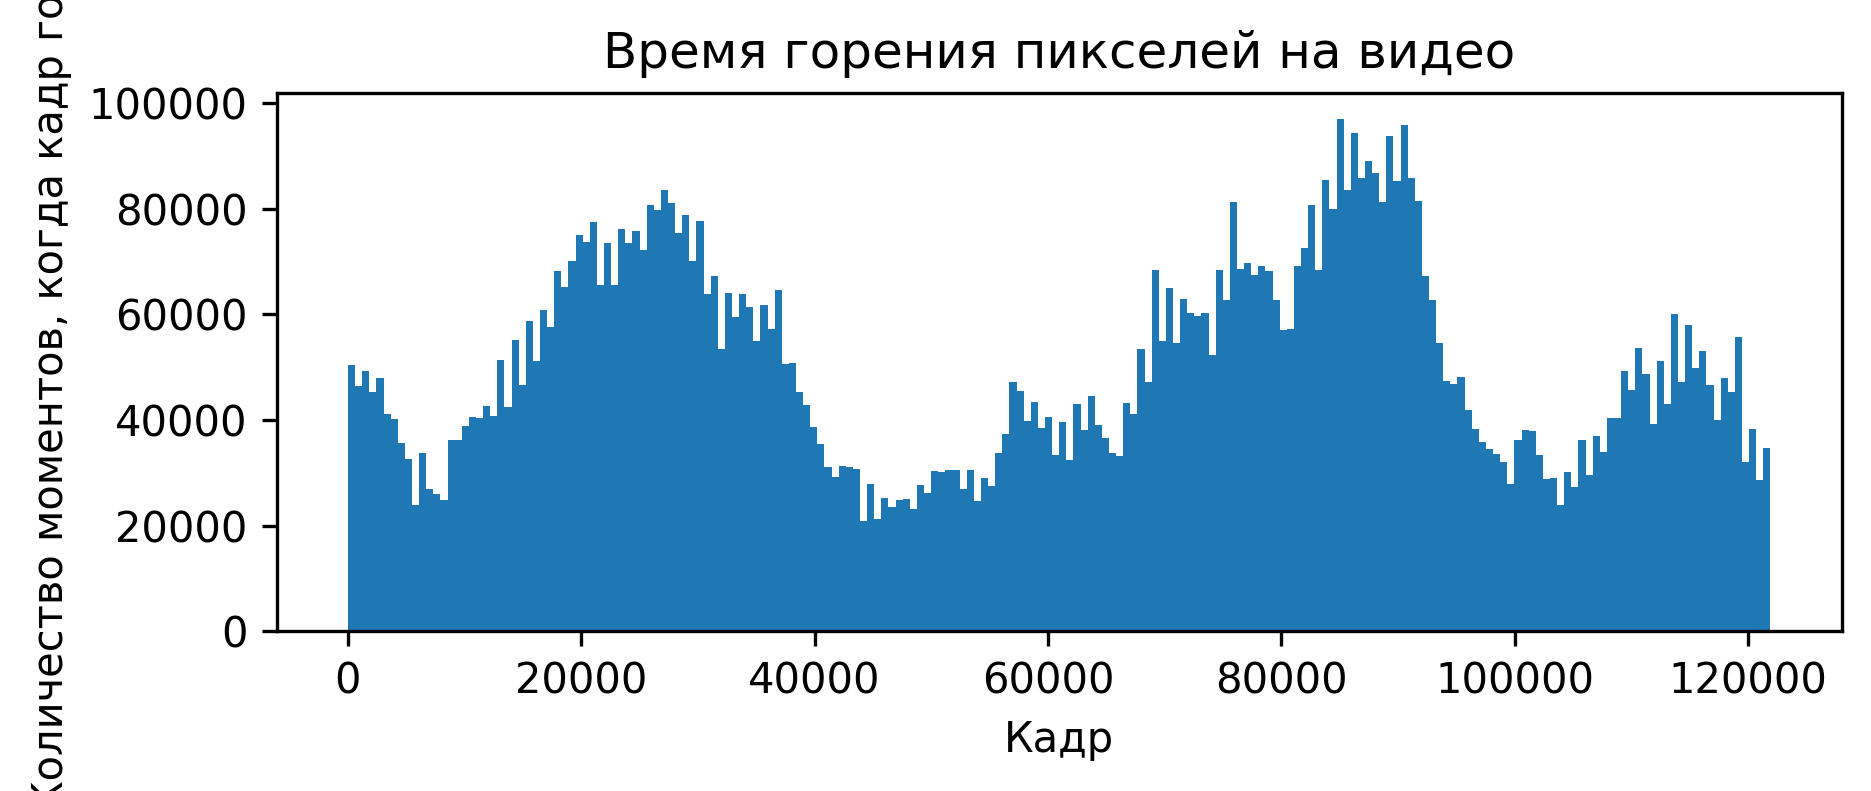

Для видео из папки «2016-05-18_fileNo11_BM3D_z-max»


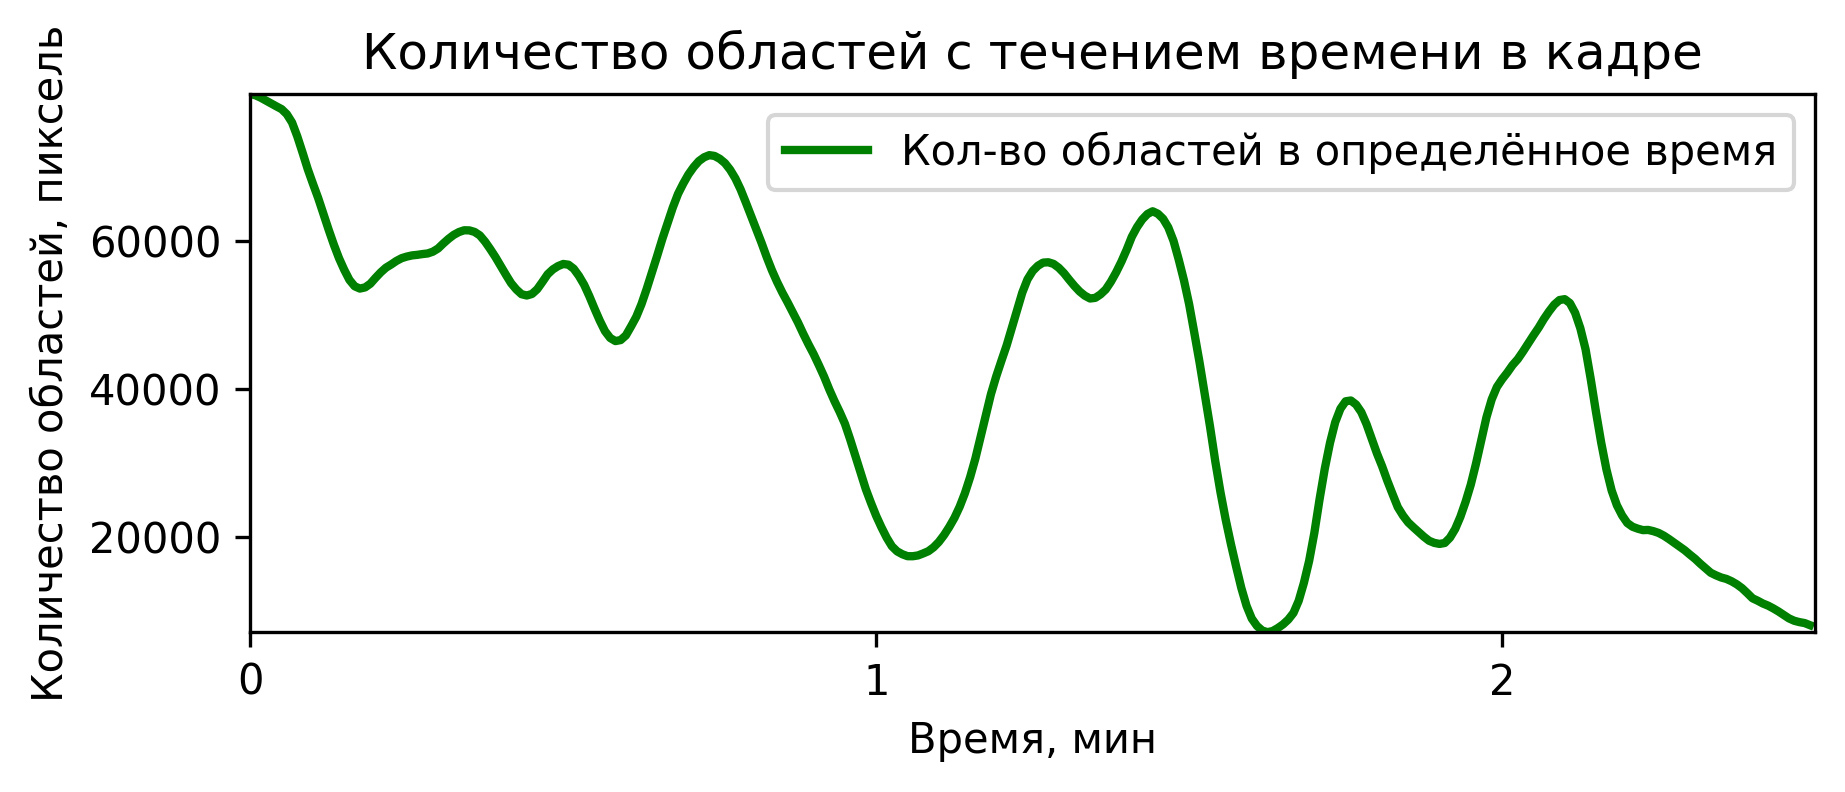

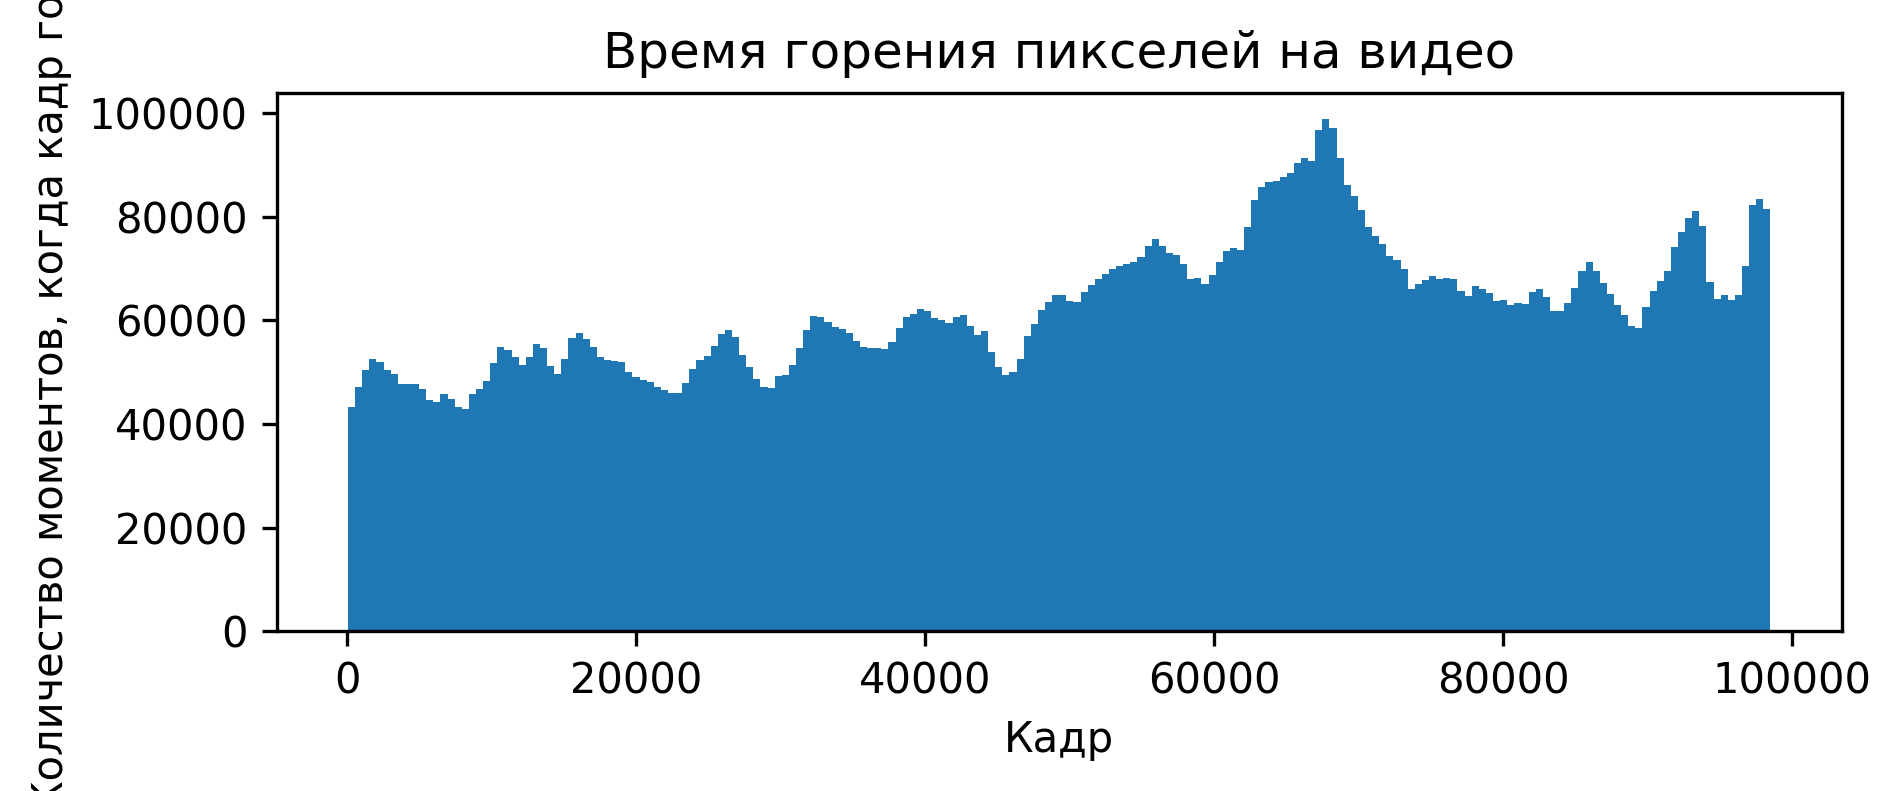

Для видео из папки «2016-05-26_fileNo32_BM3D_z-max»


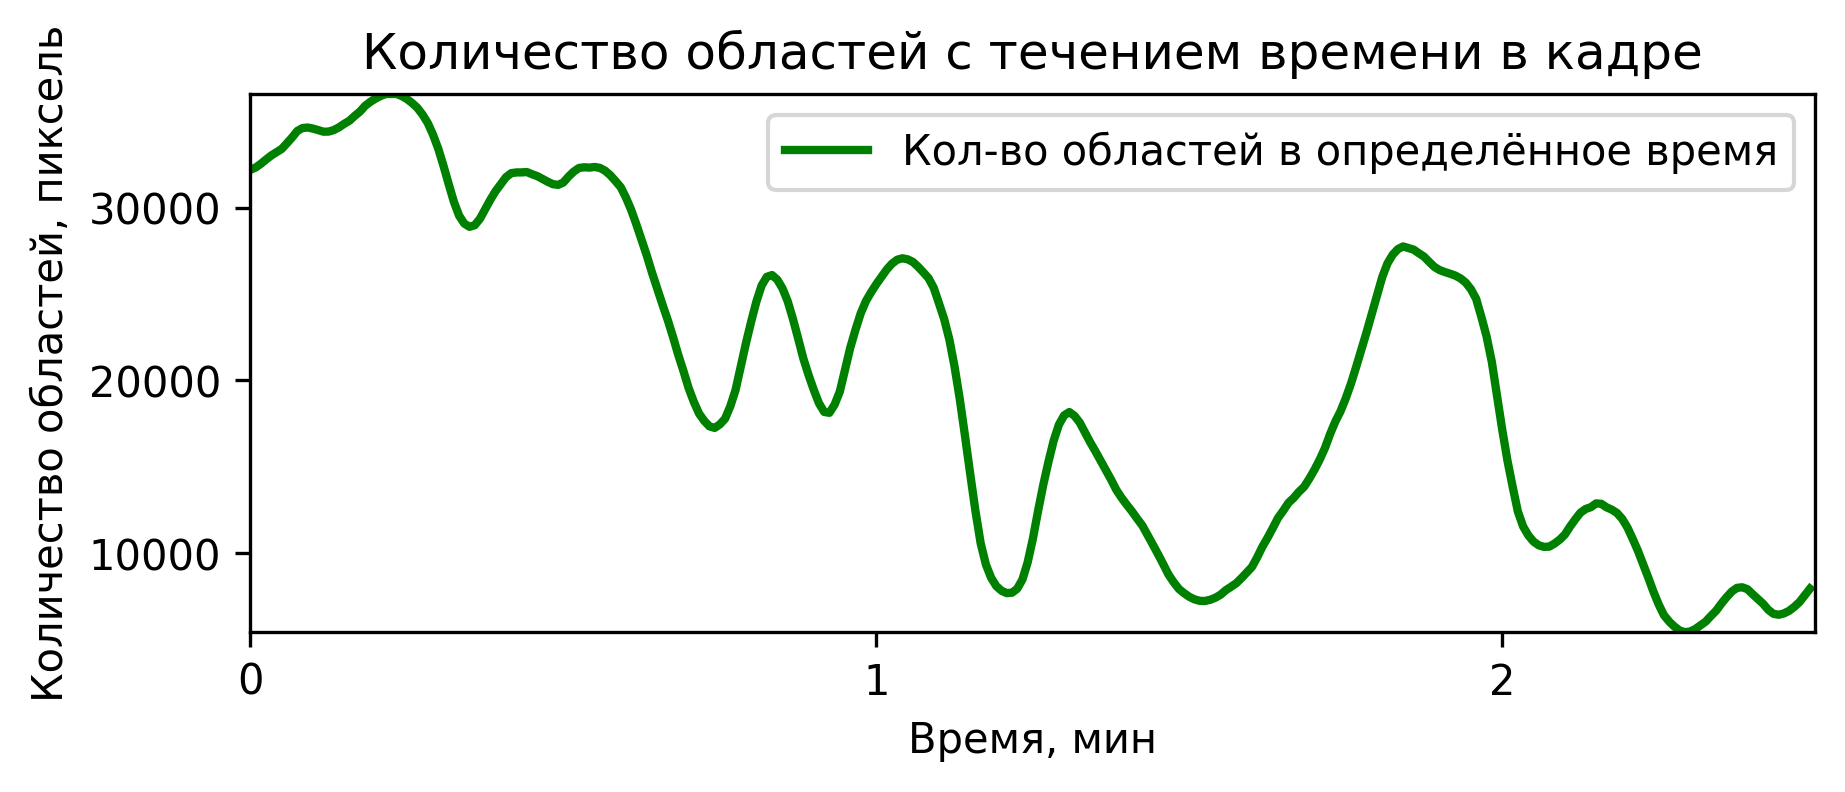

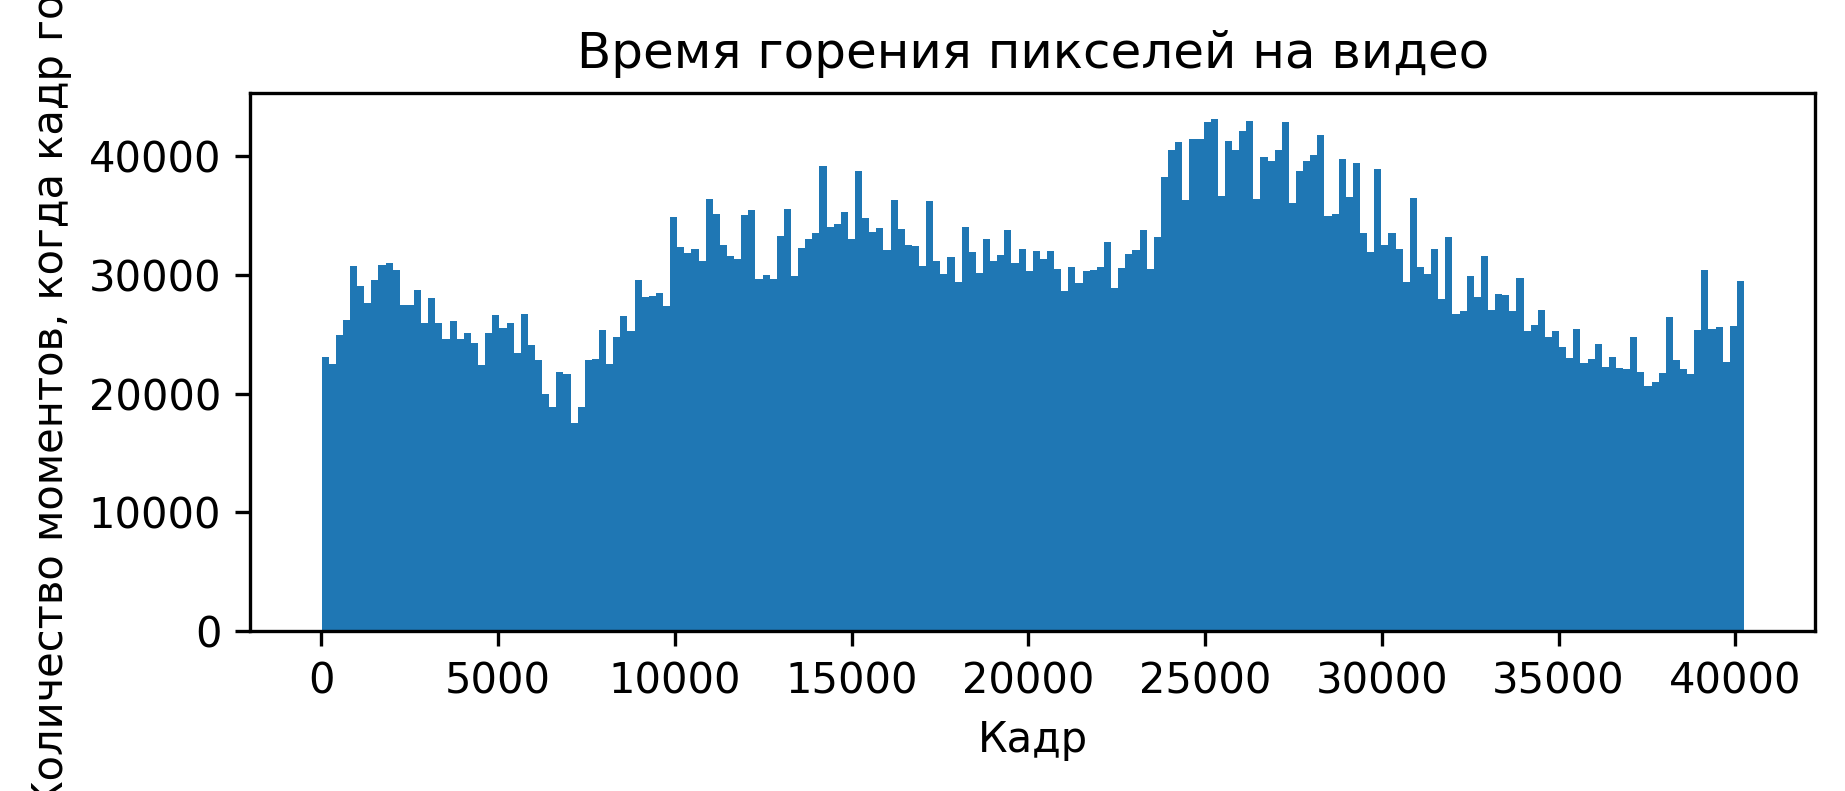

In [1]:
# Версия с подключаемыми модулями
import packageModules as pm
names = ['31_08_2020_tser1', '31_08_2020_tser2', '31_08_2020_tser3', '31_08_2020_tser4', '2016-05-18_fileNo11_BM3D_z-max', '2016-05-26_fileNo32_BM3D_z-max']
for i in range(len(names)):
    print("Для видео из папки «" + names[i] + "»")
    images = pm.im.GetEvents(names[i])
    Points = pm.cm.GetGlowPointsForGraph(images)
    pm.dm.DrawGraph(Points, names[i])
    NumLightPixel = pm.cm.GetNumLightPixel(images)
    pm.dm.DrawHistogram(NumLightPixel)